# Impacto de la deforestación en el regimen de caudales de los rios en Colombia (TEAM 28)

## Multivariate time series forecasting - VAR model

### Libraries

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


### Read data

In [10]:
macrodata = pd.read_csv('../../DS4All_2020_Team28_Project/data/matrix/matrix_consol_v2.zip')

macrodata.head(10)

date  year  month  mc  v_flow_mean  v_loss_cover  v_rainfall_total  \
0  2000-01  2000      1   7        230.4      0.000000             334.0   
1  2000-02  2000      2   7        272.4      0.000133             400.0   
2  2000-03  2000      3   7        321.6      0.000265             319.0   
3  2000-04  2000      4   7        310.8      0.000398             248.0   
4  2000-05  2000      5   7        410.0      0.000531             302.0   
5  2000-06  2000      6   7        295.9      0.000663              81.0   
6  2000-07  2000      7   7        244.2      0.000796              96.0   
7  2000-08  2000      8   7        255.0      0.000928              64.0   
8  2000-09  2000      9   7        233.8      0.001061             262.0   
9  2000-10  2000     10   7        216.0      0.001194             141.0   

   v_temperature_mean  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 NaN  
9                 NaN

In [11]:
data = macrodata.iloc[:, 3:7]

mcs = data['mc'].unique()
mcs.sort()

print(mcs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


# All basins

In [12]:
from numpy import mean 
from numpy import std
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc# show inverted results in a dataframe


 ################ Basin 1 ############### 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Jul, 2020
Time:                     18:21:14
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -8.17552
Nobs:                     203.000    HQIC:                  -9.25425
Log likelihood:           260.565    FPE:                4.65576e-05
AIC:                     -9.98718    Det(Omega_mle):     2.81738e-05
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.143641         0.209212           -0.687           0.492
L1.v_flow_mean              -0.714454         0.075202           -9.5

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


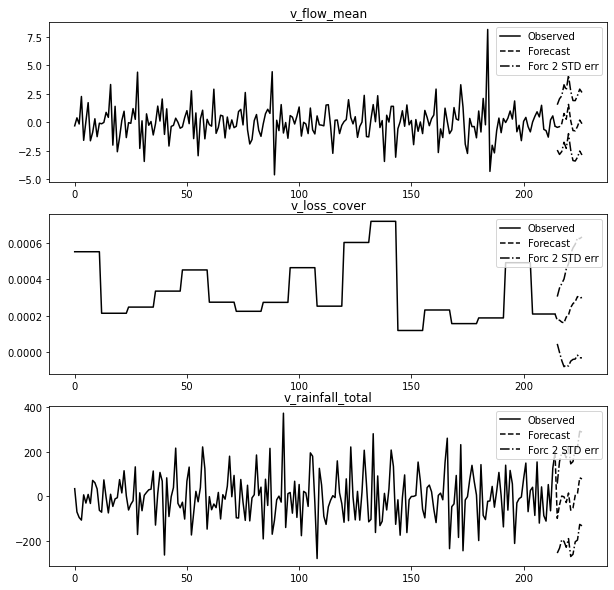

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.995481      0.004308          0.000211
2       0.994564      0.005044          0.000392
3       0.981019      0.011231          0.007750
4       0.963696      0.022264          0.014039

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.006726      0.993274          0.000000
1       0.008805      0.989332          0.001862
2       0.007533      0.969501          0.022966
3       0.011280      0.946206          0.042514
4       0.011332      0.937809          0.050860

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.002336      0.000110          0.997555
1       0.017721      0.003269          0.979010
2       0.025198      0.005109          0.969694
3       0.041413      0.022342          0.936245
4       0.041295      0.024341          0.934364


None
Bias: -0.009913
Mean absolute error: 0.3

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


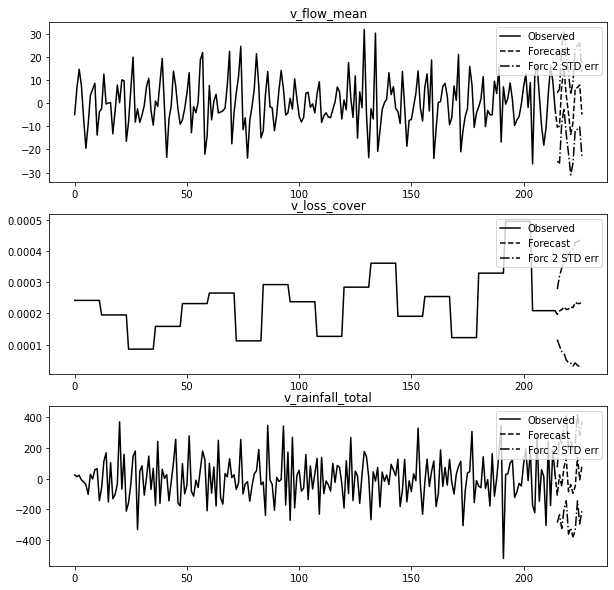

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.970009      0.005493          0.024498
2       0.963663      0.005965          0.030372
3       0.962976      0.007046          0.029979
4       0.948518      0.016593          0.034889

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000487      0.999513          0.000000
1       0.003723      0.986724          0.009553
2       0.007306      0.985544          0.007150
3       0.007548      0.986656          0.005795
4       0.009634      0.985104          0.005262

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.047019      0.014867          0.938114
1       0.103992      0.011343          0.884665
2       0.190339      0.011452          0.798209
3       0.192952      0.018963          0.788085
4       0.195675      0.020779          0.783546


None
Bias: 3.255802
Mean absolute error: 8.86

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


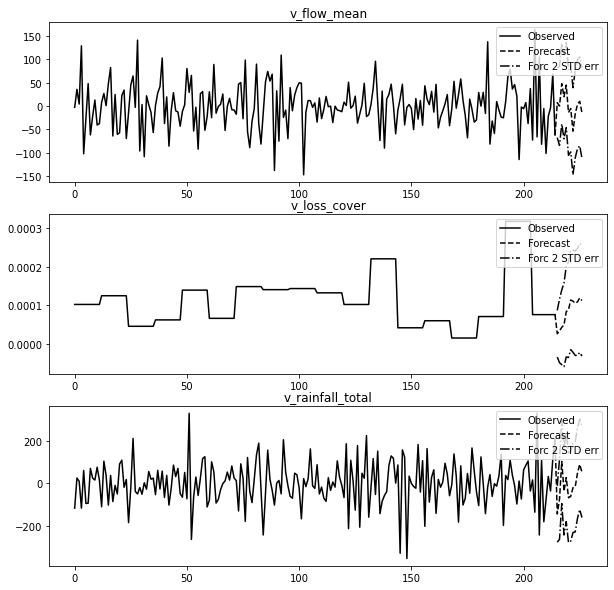

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.996300      0.002649          0.001051
2       0.960060      0.034763          0.005178
3       0.957334      0.031530          0.011136
4       0.947208      0.041590          0.011202

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000925      0.999075          0.000000
1       0.000523      0.980150          0.019328
2       0.001913      0.970703          0.027384
3       0.002082      0.954713          0.043205
4       0.001914      0.947356          0.050730

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.006131      0.021327          0.972542
1       0.119234      0.029207          0.851559
2       0.179155      0.043215          0.777631
3       0.188478      0.080241          0.731281
4       0.188324      0.079243          0.732433


None
Bias: 21.245416
Mean absolute error: 36.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


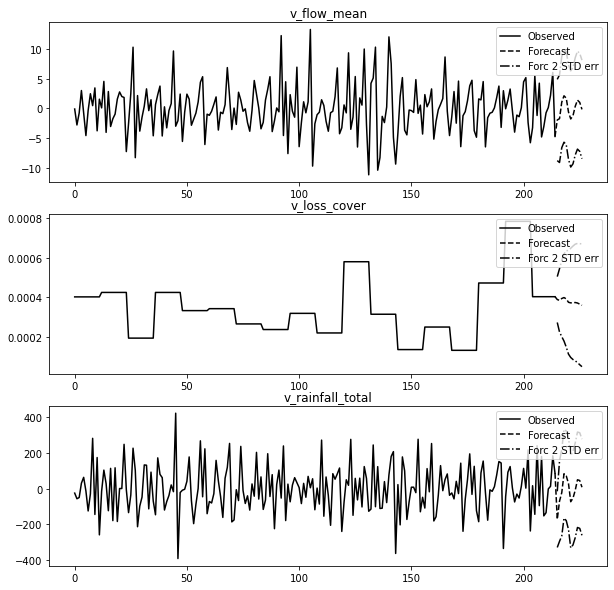

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999596      0.000338          0.000066
2       0.988818      0.005479          0.005704
3       0.988455      0.005982          0.005563
4       0.981346      0.007094          0.011560

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.011633      0.988367          0.000000
1       0.029631      0.970369          0.000000
2       0.034885      0.962400          0.002715
3       0.029559      0.963232          0.007208
4       0.024765      0.955849          0.019386

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.014341      0.036153          0.949507
1       0.246951      0.026786          0.726263
2       0.349574      0.023314          0.627112
3       0.352481      0.032118          0.615401
4       0.356411      0.037167          0.606422


None
Bias: 1.281260
Mean absolute error: 2.25

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


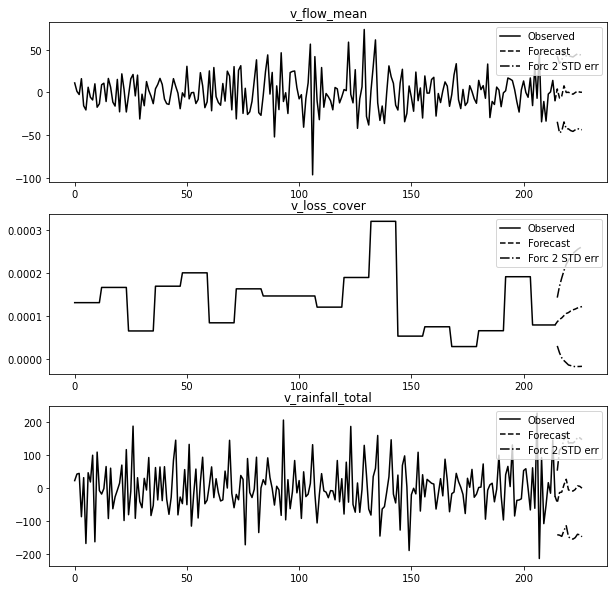

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.977090      0.001341          0.021569
2       0.975802      0.002765          0.021433
3       0.963558      0.005282          0.031159
4       0.957718      0.009791          0.032491

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000901      0.999099          0.000000
1       0.000472      0.999028          0.000499
2       0.001605      0.997828          0.000566
3       0.001753      0.997432          0.000815
4       0.002758      0.996412          0.000831

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.022111      0.007609          0.970280
1       0.136873      0.016623          0.846504
2       0.182442      0.026245          0.791314
3       0.214087      0.042063          0.743850
4       0.220707      0.054160          0.725133


None
Bias: -11.780990
Mean absolute error: 16

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


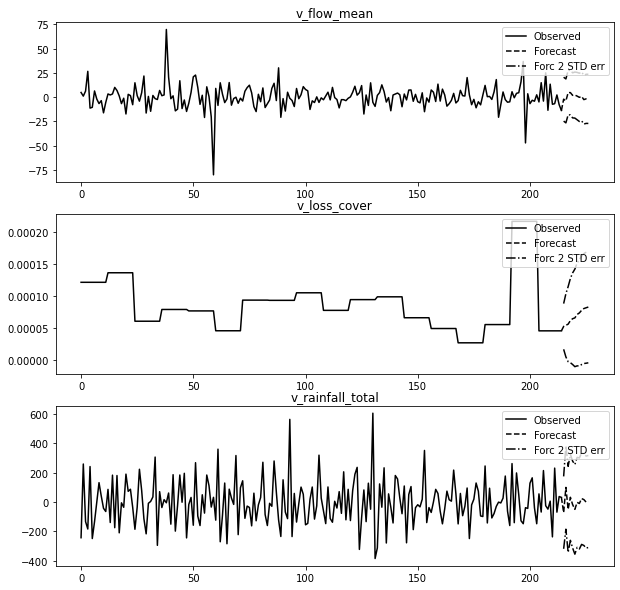

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999864      0.000092          0.000045
2       0.987176      0.007105          0.005719
3       0.985237      0.007942          0.006821
4       0.976326      0.016412          0.007262

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000001      0.999999          0.000000
1       0.000864      0.998593          0.000544
2       0.000745      0.997255          0.002000
3       0.000956      0.996895          0.002149
4       0.001870      0.995239          0.002891

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001799      0.013129          0.985073
1       0.001381      0.013273          0.985346
2       0.040510      0.012734          0.946756
3       0.040691      0.013351          0.945959
4       0.048582      0.014598          0.936820


None
Bias: -6.487092
Mean absolute error: 10.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


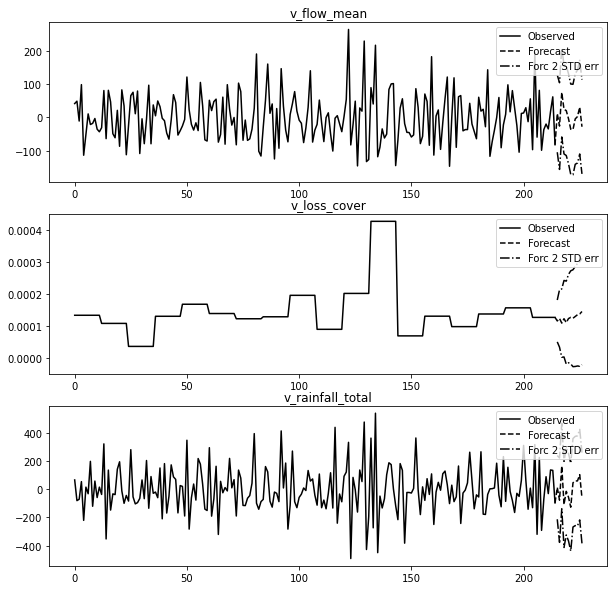

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.995084      0.000871          0.004045
2       0.963738      0.032114          0.004149
3       0.963273      0.032596          0.004131
4       0.954231      0.041192          0.004578

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.014502      0.985498          0.000000
1       0.009589      0.969565          0.020845
2       0.013185      0.961178          0.025637
3       0.014812      0.960106          0.025082
4       0.015838      0.961787          0.022375

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.258352      0.007320          0.734328
1       0.303093      0.016060          0.680847
2       0.295057      0.042046          0.662897
3       0.292084      0.044987          0.662929
4       0.301303      0.043885          0.654812


None
Bias: 12.295559
Mean absolute error: 56.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


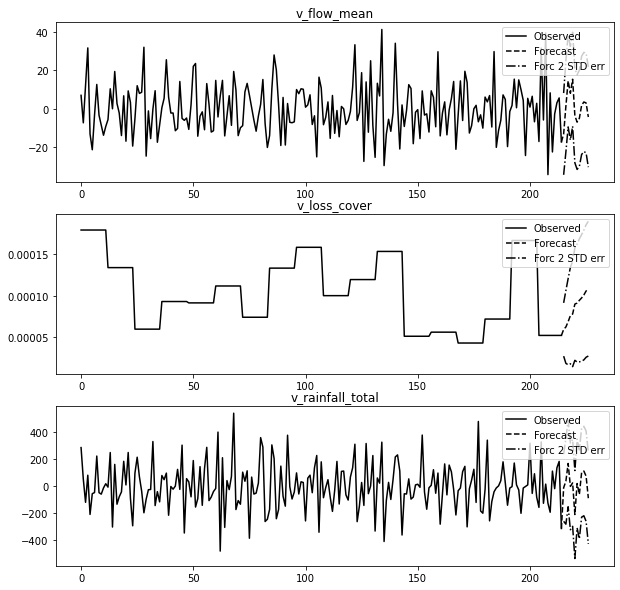

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.990893      0.000866          0.008241
2       0.979346      0.011239          0.009415
3       0.973226      0.017675          0.009099
4       0.966036      0.024886          0.009078

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.010102      0.989898          0.000000
1       0.006304      0.993362          0.000334
2       0.008557      0.990046          0.001398
3       0.010246      0.984160          0.005594
4       0.018336      0.975160          0.006504

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.143886      0.000010          0.856103
1       0.126557      0.000065          0.873379
2       0.130771      0.002988          0.866242
3       0.131771      0.003504          0.864725
4       0.132961      0.004220          0.862819


None
Bias: 2.478148
Mean absolute error: 12.5

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


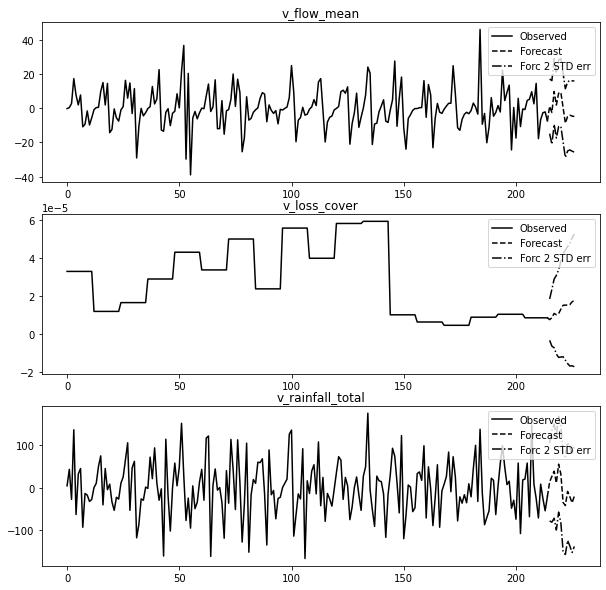

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.940332      0.003437          0.056231
2       0.916526      0.003275          0.080199
3       0.907092      0.013162          0.079746
4       0.898585      0.017122          0.084293

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000423      0.999577          0.000000
1       0.001306      0.998672          0.000022
2       0.001728      0.998084          0.000188
3       0.002493      0.995295          0.002213
4       0.003317      0.987985          0.008698

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.366144      0.000753          0.633103
1       0.367610      0.002285          0.630105
2       0.377760      0.002790          0.619450
3       0.378388      0.003380          0.618232
4       0.365723      0.033975          0.600302


None
Bias: -2.739796
Mean absolute error: 5.4

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


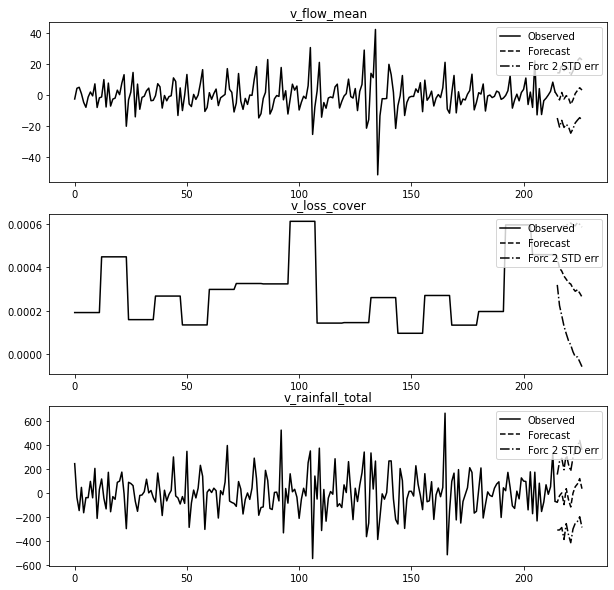

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.949137      0.002171          0.048692
2       0.918995      0.014445          0.066559
3       0.911135      0.014911          0.073953
4       0.911286      0.015837          0.072877

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001343      0.998657          0.000000
1       0.001465      0.997169          0.001366
2       0.001422      0.997190          0.001388
3       0.003375      0.995102          0.001523
4       0.003580      0.995131          0.001289

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.611768      0.012181          0.376051
1       0.633615      0.020772          0.345613
2       0.627591      0.025125          0.347284
3       0.621270      0.025575          0.353154
4       0.621985      0.025992          0.352022


None
Bias: -4.341537
Mean absolute error: 5.6

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


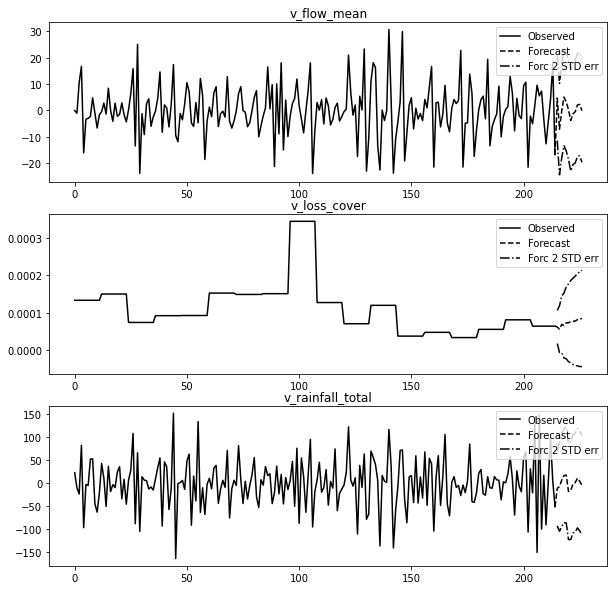

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.998083      0.000042          0.001875
2       0.985248      0.003050          0.011702
3       0.957105      0.028497          0.014398
4       0.940120      0.036014          0.023866

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000001      0.999999          0.000000
1       0.000001      0.999829          0.000170
2       0.002344      0.997541          0.000115
3       0.002187      0.994735          0.003079
4       0.001947      0.992036          0.006018

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.405278      0.002660          0.592063
1       0.363927      0.002667          0.633406
2       0.400906      0.007684          0.591410
3       0.391869      0.028043          0.580088
4       0.393086      0.047834          0.559080


None
Bias: -1.481639
Mean absolute error: 6.4

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


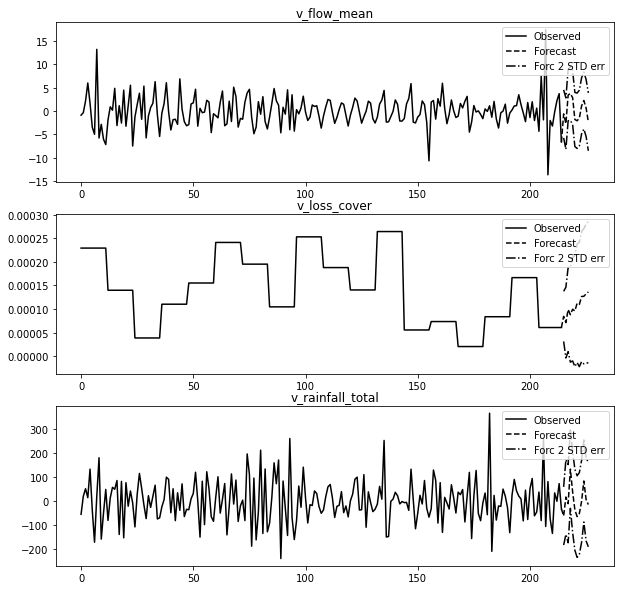

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.985329      0.005623          0.009048
2       0.983489      0.005614          0.010898
3       0.964946      0.019761          0.015293
4       0.963355      0.021211          0.015434

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.010155      0.989845          0.000000
1       0.016039      0.980512          0.003449
2       0.015676      0.978535          0.005789
3       0.017898      0.977376          0.004726
4       0.021490      0.972870          0.005640

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.013596      0.009261          0.977143
1       0.067645      0.016119          0.916235
2       0.140527      0.015535          0.843938
3       0.141380      0.015884          0.842736
4       0.133871      0.019684          0.846445


None
Bias: -7.322211
Mean absolute error: 11.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


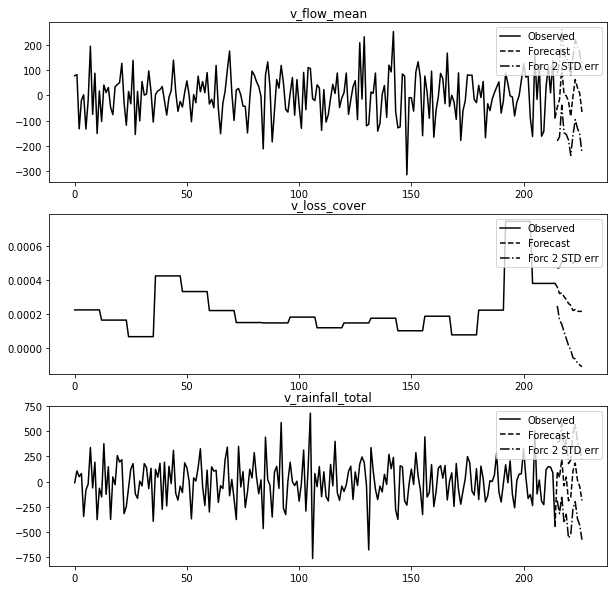

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.927947      0.001118          0.070935
2       0.922057      0.001133          0.076811
3       0.914030      0.003130          0.082841
4       0.910533      0.007275          0.082192

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.016932      0.983068          0.000000
1       0.008828      0.990708          0.000464
2       0.010833      0.986618          0.002548
3       0.016529      0.981465          0.002006
4       0.028339      0.968927          0.002734

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.412490      0.012668          0.574842
1       0.376195      0.017432          0.606373
2       0.386014      0.023281          0.590705
3       0.383111      0.029432          0.587456
4       0.380777      0.035046          0.584178


None
Bias: 70.935289
Mean absolute error: 97.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


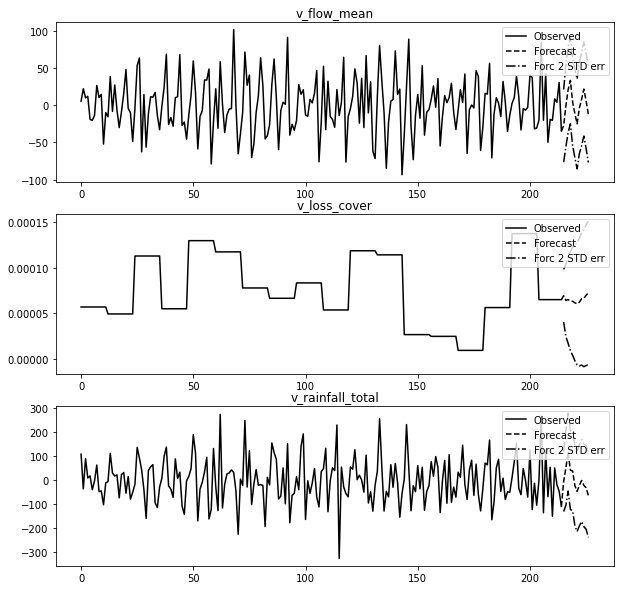

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.975931      0.004265          0.019804
2       0.941695      0.017329          0.040976
3       0.937436      0.017512          0.045051
4       0.923544      0.028422          0.048033

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000167      0.999833          0.000000
1       0.000092      0.998791          0.001117
2       0.002997      0.996058          0.000945
3       0.004547      0.994711          0.000742
4       0.003893      0.993441          0.002666

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.270352      0.000002          0.729646
1       0.297053      0.023031          0.679916
2       0.276727      0.089060          0.634213
3       0.283037      0.087961          0.629002
4       0.290337      0.090969          0.618694


None
Bias: -14.691709
Mean absolute error: 22

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


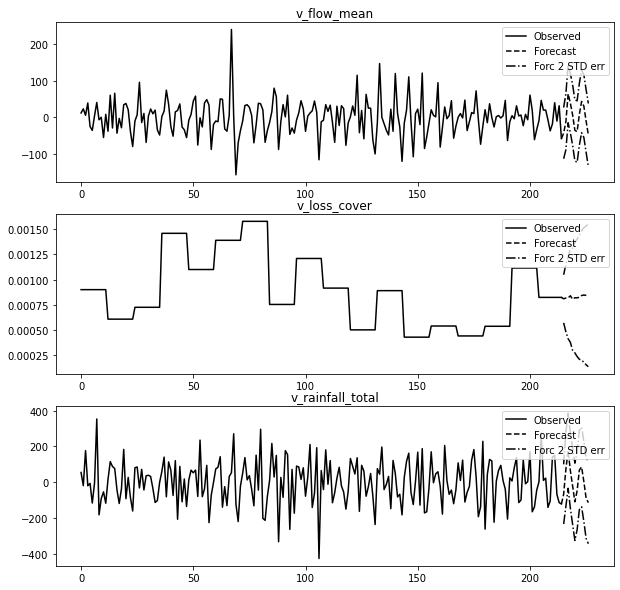

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999684      0.000311          0.000005
2       0.999688      0.000292          0.000020
3       0.989163      0.004831          0.006006
4       0.951291      0.021965          0.026744

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001860      0.998140          0.000000
1       0.001658      0.994838          0.003504
2       0.004080      0.987971          0.007949
3       0.004679      0.986929          0.008392
4       0.004446      0.988470          0.007084

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.082366      0.010222          0.907412
1       0.055431      0.013065          0.931503
2       0.070220      0.013227          0.916554
3       0.070767      0.017210          0.912022
4       0.068830      0.042768          0.888401


None
Bias: -6.091677
Mean absolute error: 23.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


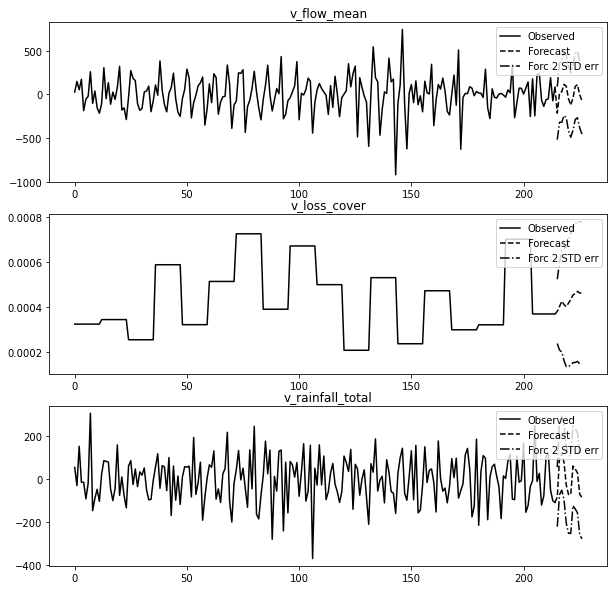

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.976588      0.016306          0.007106
2       0.941239      0.032353          0.026408
3       0.929220      0.045175          0.025605
4       0.916196      0.057874          0.025930

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000167      0.999833          0.000000
1       0.002790      0.994021          0.003188
2       0.002762      0.989902          0.007336
3       0.005180      0.986358          0.008462
4       0.009468      0.981447          0.009085

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.077572      0.013938          0.908490
1       0.060011      0.014355          0.925634
2       0.060938      0.014202          0.924860
3       0.060918      0.020869          0.918214
4       0.059243      0.042694          0.898063


None
Bias: 56.022729
Mean absolute error: 106

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


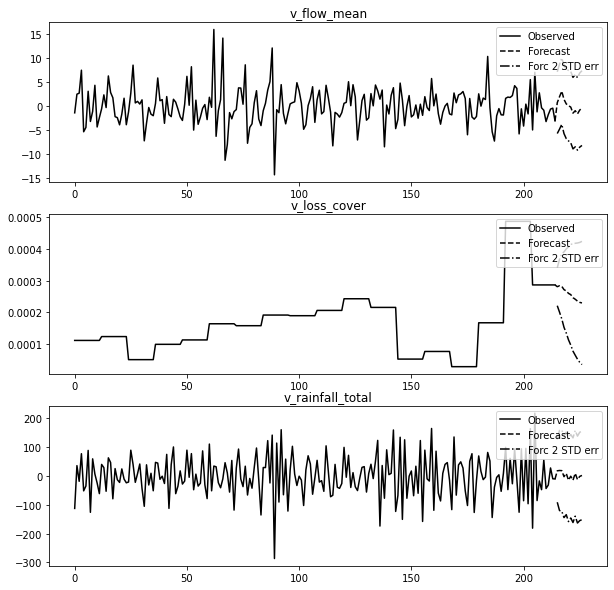

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.983939      0.009688          0.006373
2       0.969326      0.009356          0.021318
3       0.962699      0.014324          0.022977
4       0.937127      0.021733          0.041140

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.002369      0.997631          0.000000
1       0.002157      0.977242          0.020600
2       0.008011      0.930871          0.061118
3       0.009317      0.899315          0.091368
4       0.008964      0.875673          0.115363

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.343560      0.005409          0.651030
1       0.299964      0.029357          0.670679
2       0.296727      0.045384          0.657889
3       0.305772      0.044760          0.649468
4       0.304175      0.054672          0.641153


None
Bias: -0.515023
Mean absolute error: 2.0

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


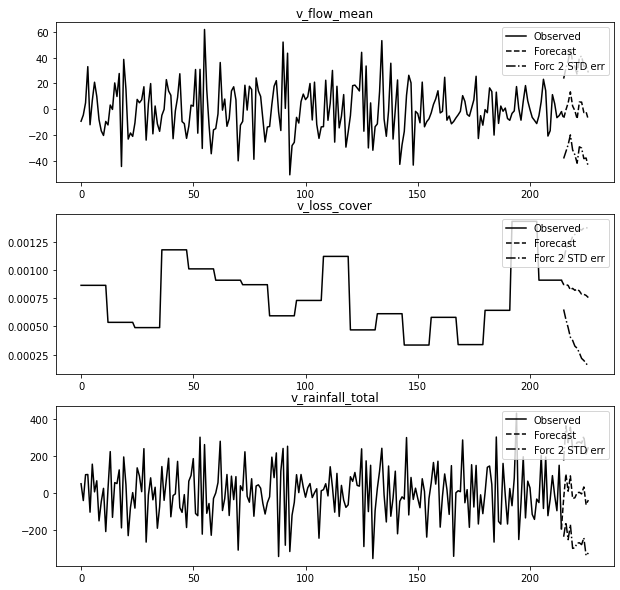

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.994297      0.000305          0.005398
2       0.993120      0.000305          0.006575
3       0.987162      0.003961          0.008878
4       0.973566      0.007664          0.018771

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.009799      0.990201          0.000000
1       0.016176      0.982861          0.000964
2       0.025988      0.966829          0.007183
3       0.027946      0.965821          0.006233
4       0.033170      0.961200          0.005630

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.398072      0.000209          0.601719
1       0.393101      0.001274          0.605625
2       0.388729      0.012706          0.598565
3       0.391418      0.014877          0.593706
4       0.398131      0.014832          0.587037


None
Bias: 1.747177
Mean absolute error: 8.89

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


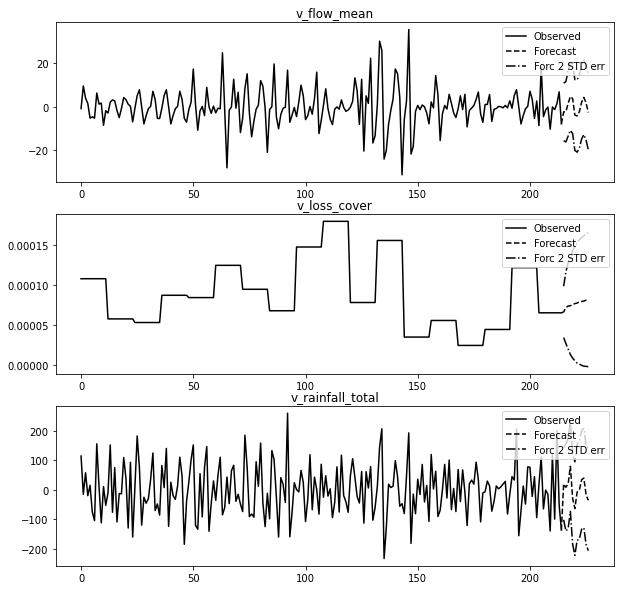

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.965986      0.005935          0.028079
2       0.962576      0.006330          0.031094
3       0.962365      0.008278          0.029357
4       0.930459      0.008068          0.061473

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001237      0.998763          0.000000
1       0.009963      0.988895          0.001142
2       0.006919      0.990473          0.002607
3       0.005406      0.991874          0.002720
4       0.004879      0.992851          0.002270

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.374176      0.000894          0.624930
1       0.328020      0.004801          0.667180
2       0.347126      0.016509          0.636365
3       0.352898      0.018179          0.628923
4       0.354093      0.018144          0.627763


None
Bias: -4.240534
Mean absolute error: 4.6

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


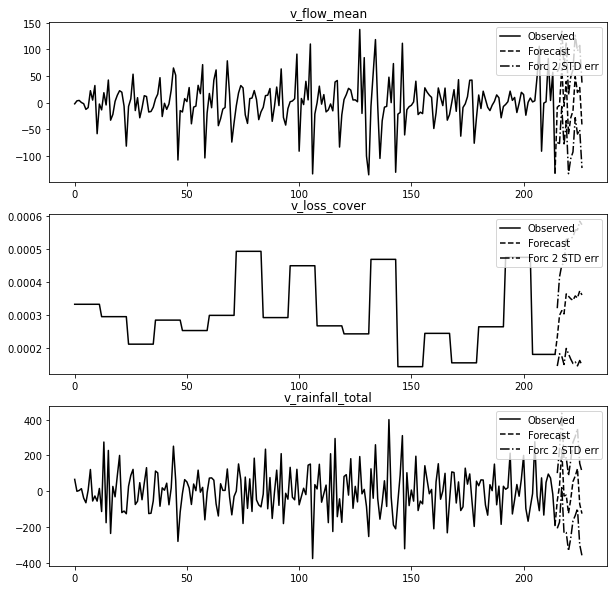

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.998727      0.000680          0.000593
2       0.997197      0.000881          0.001922
3       0.994091      0.000852          0.005058
4       0.991673      0.000946          0.007381

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.003329      0.996671          0.000000
1       0.004854      0.991373          0.003773
2       0.015366      0.973627          0.011007
3       0.012980      0.976773          0.010247
4       0.012671      0.960672          0.026657

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.323453      0.031357          0.645189
1       0.243177      0.054329          0.702493
2       0.244414      0.059858          0.695729
3       0.249801      0.058145          0.692054
4       0.247700      0.059789          0.692511


None
Bias: 72.807922
Mean absolute error: 81.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


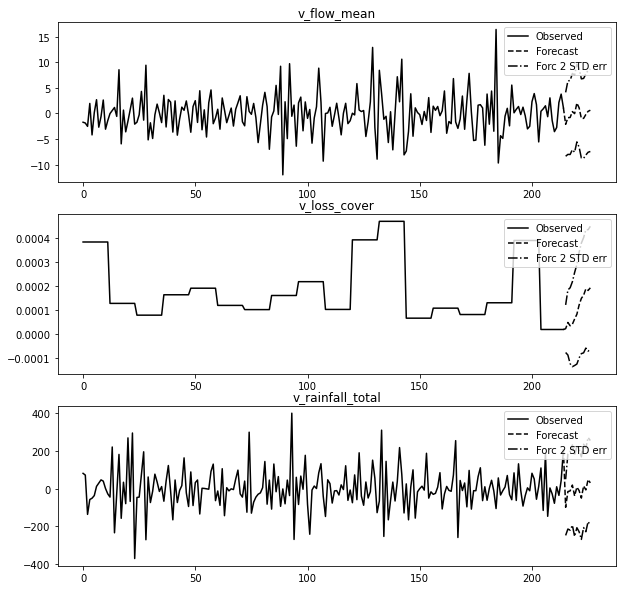

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.974952      0.005546          0.019502
2       0.971215      0.005834          0.022951
3       0.964684      0.008355          0.026962
4       0.952376      0.016533          0.031091

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.014633      0.985367          0.000000
1       0.022784      0.976776          0.000440
2       0.017262      0.982404          0.000334
3       0.016183      0.983332          0.000484
4       0.019308      0.980125          0.000566

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.040226      0.009130          0.950644
1       0.068103      0.013224          0.918673
2       0.140126      0.012043          0.847831
3       0.139681      0.027056          0.833263
4       0.137537      0.036303          0.826160


None
Bias: 1.407458
Mean absolute error: 2.02

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


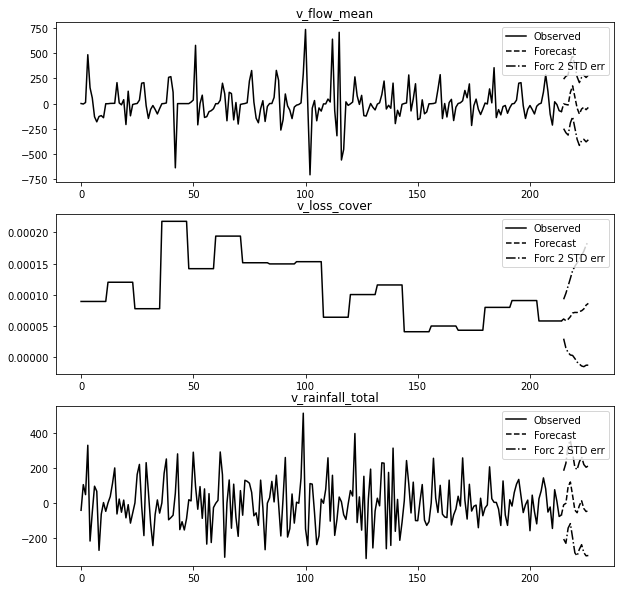

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.969878      0.001576          0.028547
2       0.970644      0.002945          0.026411
3       0.952030      0.002946          0.045024
4       0.938416      0.004625          0.056959

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000226      0.999774          0.000000
1       0.000989      0.998181          0.000830
2       0.000924      0.997145          0.001931
3       0.001432      0.996896          0.001671
4       0.003743      0.993382          0.002875

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.077544      0.000518          0.921938
1       0.134524      0.000589          0.864886
2       0.132840      0.004339          0.862820
3       0.133078      0.007413          0.859508
4       0.132584      0.031756          0.835660


None
Bias: -35.946093
Mean absolute error: 69

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


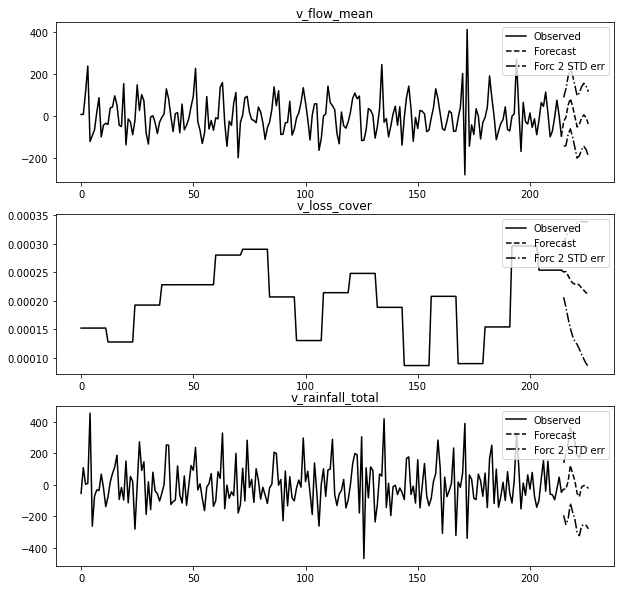

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.977151      0.000409          0.022440
2       0.966730      0.003626          0.029644
3       0.934812      0.029051          0.036137
4       0.894342      0.070787          0.034871

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.001309      0.998691          0.000000
1       0.002460      0.991816          0.005725
2       0.010455      0.984762          0.004783
3       0.012649      0.981082          0.006269
4       0.013393      0.975288          0.011319

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.076365      0.001468          0.922167
1       0.101752      0.004864          0.893385
2       0.208399      0.011834          0.779767
3       0.207567      0.011797          0.780636
4       0.223753      0.014351          0.761896


None
Bias: -38.963251
Mean absolute error: 62

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


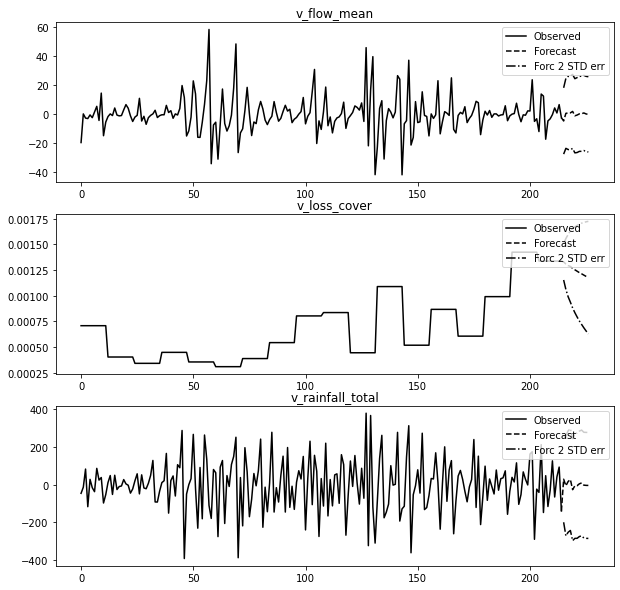

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.922151      0.000090          0.077759
2       0.920936      0.004444          0.074621
3       0.907569      0.004412          0.088020
4       0.906064      0.005636          0.088300

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000190      0.999810          0.000000
1       0.000951      0.995028          0.004021
2       0.000643      0.992278          0.007080
3       0.001133      0.990492          0.008375
4       0.001998      0.987716          0.010286

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.414390      0.003332          0.582278
1       0.465824      0.002509          0.531667
2       0.470005      0.002824          0.527171
3       0.466842      0.002904          0.530254
4       0.467960      0.003005          0.529035


None
Bias: -0.929525
Mean absolute error: 7.1

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


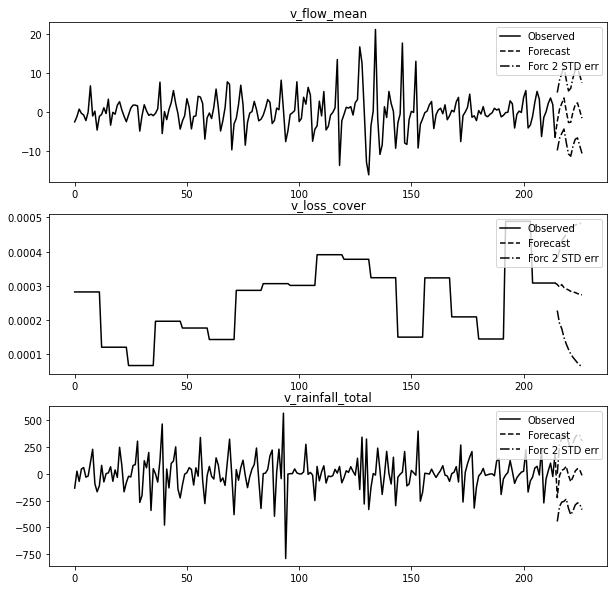

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.998107      0.000277          0.001616
2       0.992404      0.003651          0.003945
3       0.990311      0.005945          0.003744
4       0.982234      0.007616          0.010150

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000285      0.999715          0.000000
1       0.003446      0.996505          0.000050
2       0.003946      0.995908          0.000146
3       0.003056      0.993685          0.003259
4       0.003214      0.993563          0.003223

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.009834      0.000272          0.989894
1       0.183930      0.000182          0.815888
2       0.227435      0.001316          0.771250
3       0.240352      0.003061          0.756587
4       0.239074      0.024824          0.736102


None
Bias: 1.678928
Mean absolute error: 2.95

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


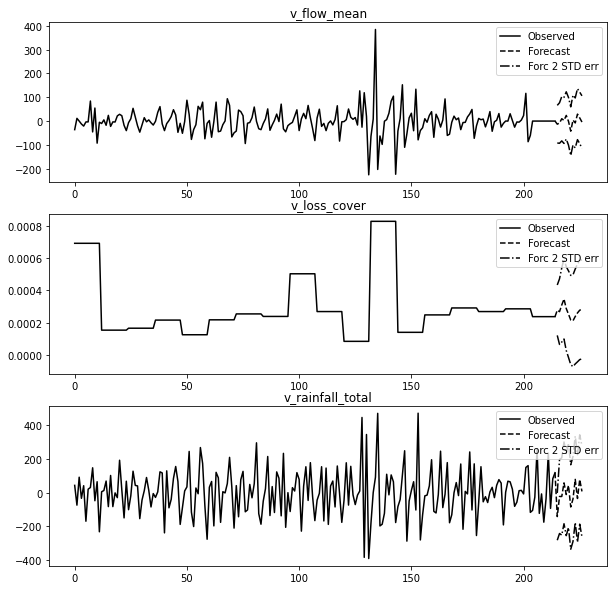

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.992773      0.007222          0.000005
2       0.926007      0.070454          0.003539
3       0.866625      0.067635          0.065741
4       0.856579      0.069633          0.073787

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.011539      0.988461          0.000000
1       0.025146      0.974215          0.000640
2       0.027727      0.969126          0.003147
3       0.027882      0.963742          0.008376
4       0.025469      0.966860          0.007671

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.012423      0.014083          0.973494
1       0.222245      0.008134          0.769621
2       0.276738      0.011793          0.711470
3       0.317538      0.042490          0.639972
4       0.314674      0.042008          0.643319


None
Bias: -105.488429
Mean absolute error: 1

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


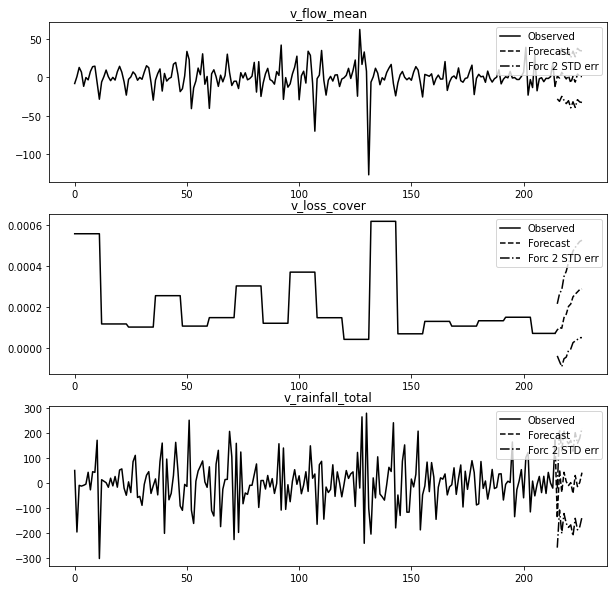

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.994408      0.005446          0.000146
2       0.988966      0.007476          0.003558
3       0.981966      0.008840          0.009195
4       0.980420      0.009504          0.010075

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.009159      0.990841          0.000000
1       0.047218      0.948638          0.004145
2       0.054708      0.939281          0.006011
3       0.062077      0.921976          0.015946
4       0.062838      0.920487          0.016674

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.002465      0.006757          0.990778
1       0.201595      0.007248          0.791157
2       0.236034      0.007882          0.756085
3       0.235963      0.007892          0.756145
4       0.255466      0.008010          0.736524


None
Bias: 5.650132
Mean absolute error: 11.5

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


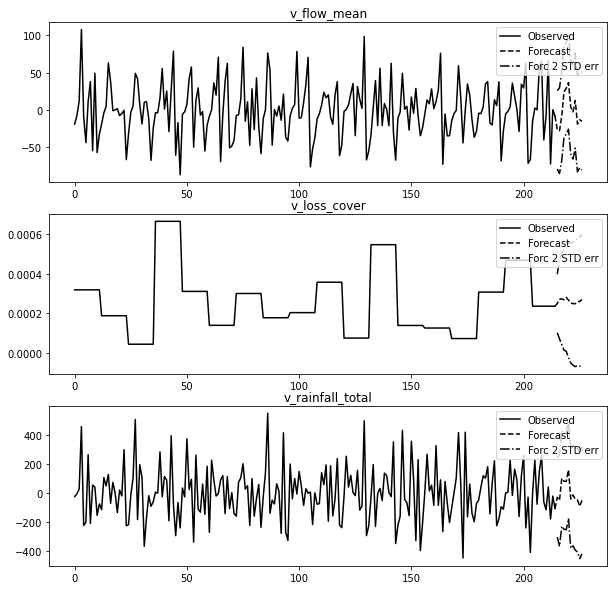

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.997722      0.001205          0.001072
2       0.995997      0.001701          0.002302
3       0.993239      0.004338          0.002424
4       0.974643      0.007053          0.018303

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000006      0.999994          0.000000
1       0.004250      0.995214          0.000537
2       0.004180      0.990178          0.005642
3       0.003895      0.990990          0.005115
4       0.004740      0.983065          0.012195

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.229548      0.001800          0.768652
1       0.191214      0.002440          0.806346
2       0.226581      0.016280          0.757138
3       0.235614      0.017129          0.747258
4       0.236329      0.023561          0.740110


None
Bias: 8.429556
Mean absolute error: 22.8

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


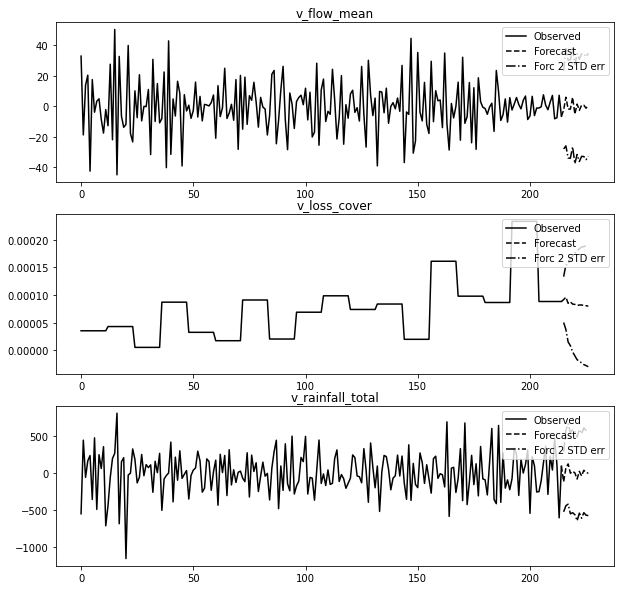

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.994856      0.001443          0.003702
2       0.985713      0.002946          0.011341
3       0.975394      0.003250          0.021357
4       0.973380      0.005093          0.021526

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.010606      0.989394          0.000000
1       0.009641      0.990354          0.000005
2       0.008697      0.991295          0.000007
3       0.016304      0.981905          0.001791
4       0.020464      0.976394          0.003143

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.011517      0.000043          0.988439
1       0.218057      0.000128          0.781815
2       0.287367      0.002948          0.709685
3       0.281701      0.022485          0.695813
4       0.283418      0.039107          0.677474


None
Bias: -2.994107
Mean absolute error: 4.2

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


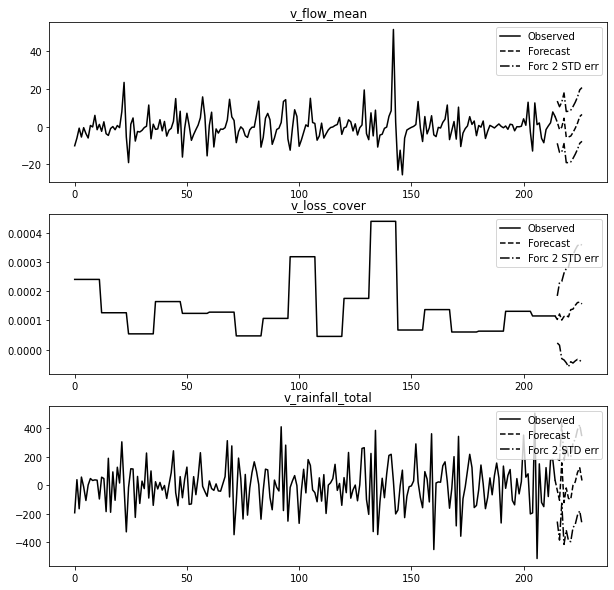

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.933626      0.000002          0.066372
2       0.901171      0.042781          0.056048
3       0.887620      0.041460          0.070920
4       0.883689      0.044880          0.071431

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.002665      0.997335          0.000000
1       0.013453      0.982686          0.003860
2       0.089934      0.884292          0.025774
3       0.115759      0.851759          0.032482
4       0.126357      0.829771          0.043871

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.216370      0.005768          0.777861
1       0.288388      0.010963          0.700649
2       0.281930      0.032714          0.685355
3       0.282000      0.042273          0.675727
4       0.292468      0.043042          0.664490


None
Bias: 5.450880
Mean absolute error: 7.77

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


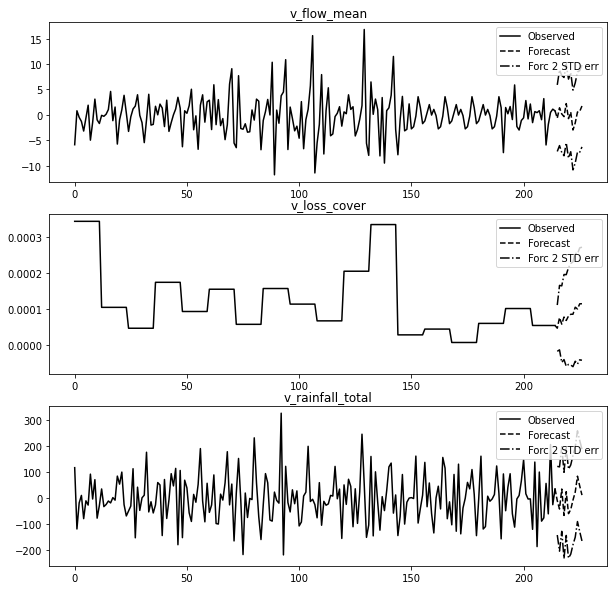

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.943208      0.001529          0.055263
2       0.936999      0.008741          0.054260
3       0.911343      0.010399          0.078258
4       0.907172      0.012769          0.080059

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.058771      0.941229          0.000000
1       0.046337      0.941459          0.012204
2       0.036428      0.949051          0.014522
3       0.029697      0.948019          0.022284
4       0.027156      0.947168          0.025676

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.047691      0.001433          0.950875
1       0.053998      0.000989          0.945012
2       0.055785      0.007144          0.937071
3       0.069011      0.009840          0.921150
4       0.070476      0.014855          0.914669


None
Bias: 0.603858
Mean absolute error: 1.39

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


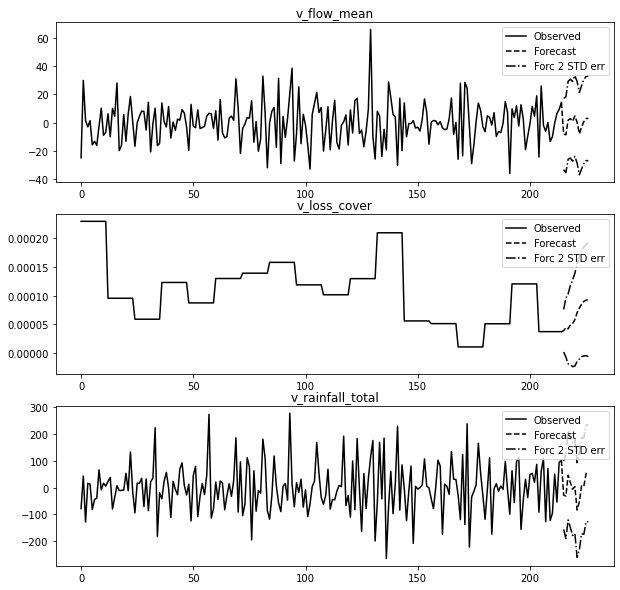

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.999678      0.000058          0.000264
2       0.989112      0.005552          0.005337
3       0.981730      0.007076          0.011194
4       0.963543      0.025375          0.011082

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.010760      0.989240          0.000000
1       0.005661      0.989066          0.005273
2       0.004183      0.988134          0.007682
3       0.009814      0.978819          0.011366
4       0.014017      0.971839          0.014144

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.087557      0.005425          0.907017
1       0.090812      0.011815          0.897373
2       0.172447      0.010689          0.816865
3       0.172925      0.019568          0.807507
4       0.183035      0.025613          0.791352


None
Bias: 5.616847
Mean absolute error: 8.27

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


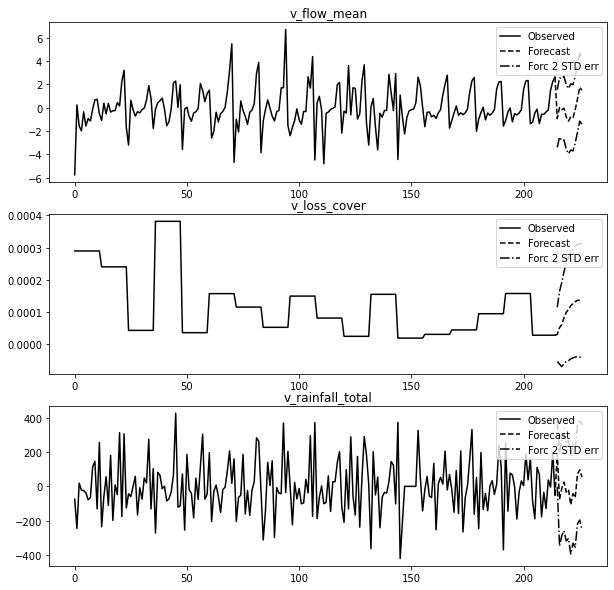

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.994779      0.002845          0.002376
2       0.960256      0.003385          0.036359
3       0.917718      0.008866          0.073416
4       0.905989      0.009681          0.084330

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.055001      0.944999          0.000000
1       0.037003      0.961242          0.001756
2       0.027775      0.970755          0.001470
3       0.023246      0.975515          0.001240
4       0.020843      0.977123          0.002034

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000010      0.001889          0.998101
1       0.168556      0.004561          0.826882
2       0.197486      0.004793          0.797721
3       0.199912      0.004596          0.795492
4       0.198316      0.004554          0.797130


None
Bias: 1.689008
Mean absolute error: 1.86

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


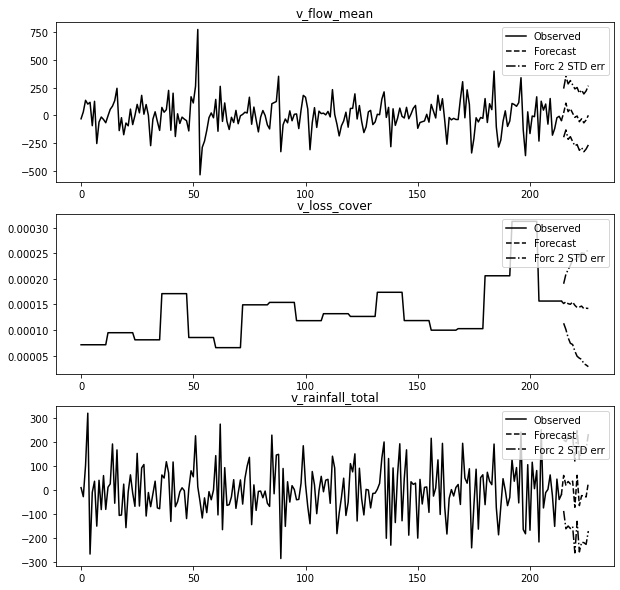

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.971190      0.007421          0.021389
2       0.955670      0.007947          0.036383
3       0.950135      0.009196          0.040669
4       0.946267      0.009048          0.044685

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.004956      0.995044          0.000000
1       0.003748      0.996176          0.000077
2       0.007856      0.985483          0.006661
3       0.008019      0.973710          0.018271
4       0.007241      0.975992          0.016767

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.482705      0.000804          0.516491
1       0.463370      0.003906          0.532724
2       0.460745      0.025079          0.514176
3       0.460222      0.025155          0.514623
4       0.461620      0.025933          0.512446


None
Bias: -47.334519
Mean absolute error: 11

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


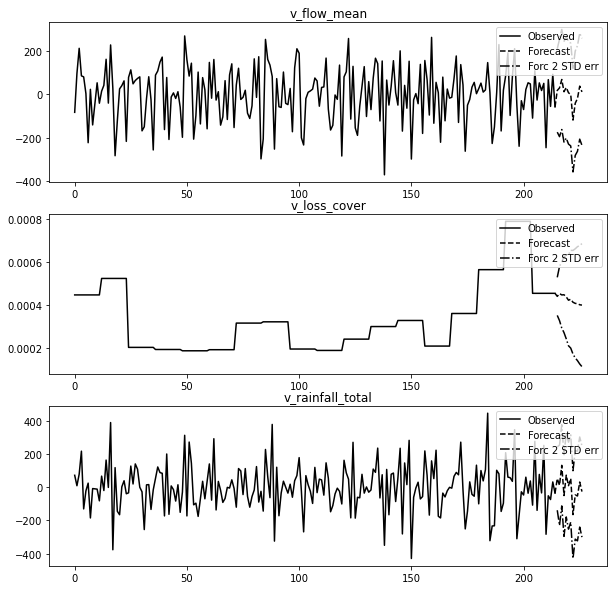

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.994145      0.004628          0.001227
2       0.979061      0.004402          0.016537
3       0.974469      0.008756          0.016774
4       0.967792      0.015589          0.016619

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000155      0.999845          0.000000
1       0.002461      0.996034          0.001505
2       0.002026      0.993294          0.004680
3       0.002836      0.990928          0.006236
4       0.002994      0.991813          0.005193

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.366925      0.000005          0.633070
1       0.353321      0.004272          0.642407
2       0.347269      0.014279          0.638453
3       0.351966      0.015916          0.632118
4       0.336026      0.060185          0.603789


None
Bias: -44.619369
Mean absolute error: 82

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


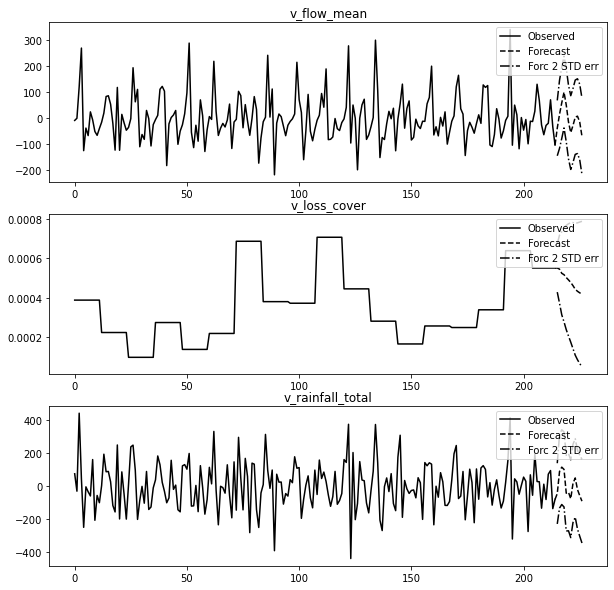

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.895142      0.003937          0.100921
2       0.874700      0.015235          0.110066
3       0.869416      0.020818          0.109766
4       0.833280      0.027514          0.139207

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000632      0.999368          0.000000
1       0.000352      0.986751          0.012897
2       0.000381      0.983754          0.015866
3       0.000468      0.984224          0.015308
4       0.000405      0.986220          0.013375

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.441431      0.001154          0.557414
1       0.518557      0.002485          0.478958
2       0.504568      0.006419          0.489013
3       0.503971      0.009806          0.486224
4       0.496049      0.013064          0.490887


None
Bias: -43.834120
Mean absolute error: 63

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Jul, 2020
Time:                     18:21:37
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.49514
Nobs:                     203.000    HQIC:                  -2.57387
Log likelihood:          -417.494    FPE:                  0.0370889
AIC:                     -3.30679    Det(Omega_mle):       0.0224439
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        2.602156        11.663774            0.223           0.823
L1.v_flow_mean              -0.609068         0.099363           -6.130           0.000
L1.v_loss_cover         13

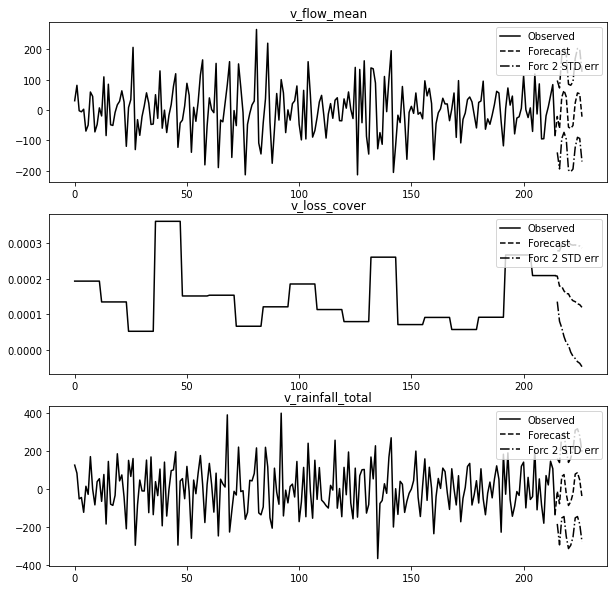

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.981657      0.005111          0.013232
2       0.947945      0.005243          0.046812
3       0.945077      0.008279          0.046644
4       0.929651      0.016993          0.053357

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.016567      0.983433          0.000000
1       0.009480      0.986793          0.003727
2       0.009270      0.982833          0.007897
3       0.007654      0.985540          0.006807
4       0.007526      0.984331          0.008143

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.384092      0.000027          0.615881
1       0.397477      0.000668          0.601855
2       0.392345      0.002600          0.605055
3       0.390259      0.015962          0.593778
4       0.378556      0.027490          0.593954


None
Bias: -28.647698
Mean absolute error: 42

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


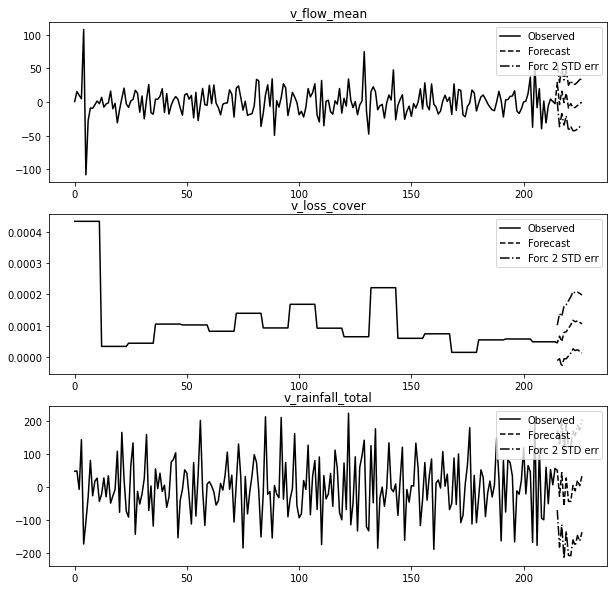

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.908327      0.012107          0.079567
2       0.895469      0.013330          0.091201
3       0.889186      0.013580          0.097234
4       0.881396      0.022174          0.096430

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000681      0.999319          0.000000
1       0.008172      0.991781          0.000047
2       0.015768      0.984000          0.000232
3       0.014676      0.984811          0.000512
4       0.015862      0.973184          0.010954

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.172052      0.007140          0.820808
1       0.219454      0.013670          0.766876
2       0.209985      0.045390          0.744626
3       0.207405      0.059954          0.732641
4       0.222184      0.058309          0.719507


None
Bias: 17.893402
Mean absolute error: 23.

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


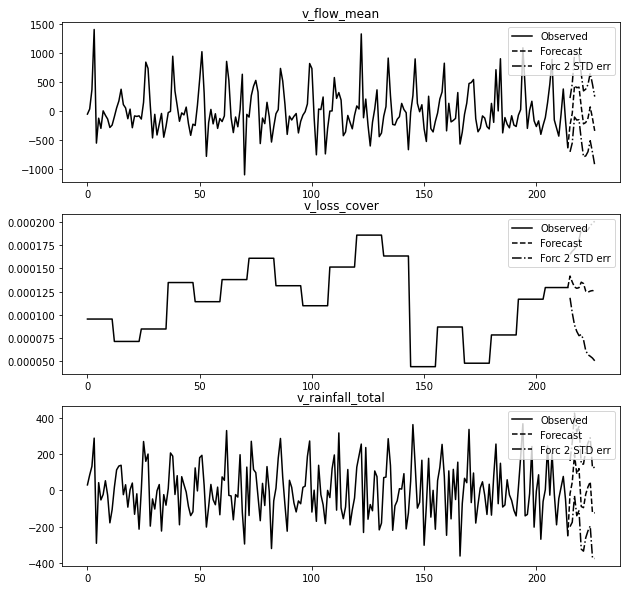

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.939052      0.000284          0.060664
2       0.897104      0.003145          0.099751
3       0.881191      0.003399          0.115410
4       0.873726      0.009865          0.116410

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000586      0.999414          0.000000
1       0.000798      0.999067          0.000136
2       0.000543      0.990828          0.008630
3       0.000883      0.992431          0.006686
4       0.003577      0.984105          0.012318

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.414956      0.000292          0.584751
1       0.417768      0.000397          0.581835
2       0.405357      0.001364          0.593280
3       0.410912      0.011928          0.577159
4       0.414433      0.012710          0.572857


None
Bias: -176.636458
Mean absolute error: 2

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


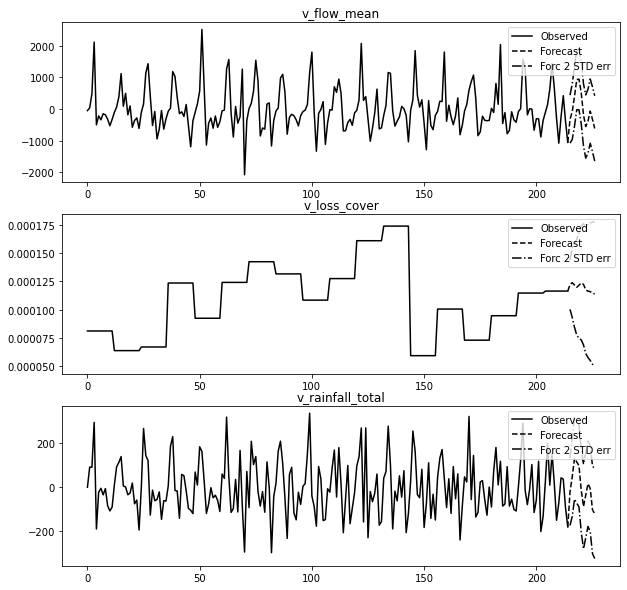

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.848593      0.004605          0.146802
2       0.848256      0.004869          0.146875
3       0.831434      0.005299          0.163267
4       0.818105      0.007267          0.174628

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000209      0.999791          0.000000
1       0.000116      0.999839          0.000046
2       0.000121      0.998178          0.001701
3       0.000099      0.997034          0.002868
4       0.000331      0.996163          0.003506

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.367531      0.000008          0.632461
1       0.412855      0.001246          0.585899
2       0.404573      0.007507          0.587920
3       0.398472      0.017351          0.584177
4       0.398246      0.018271          0.583483


None
Bias: -289.263330
Mean absolute error: 5

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


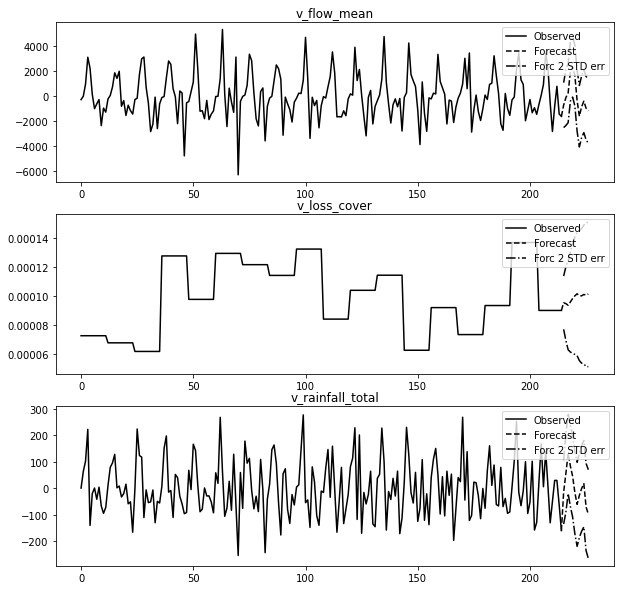

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.839502      0.004337          0.156161
2       0.822491      0.008389          0.169120
3       0.816134      0.010445          0.173421
4       0.800160      0.010374          0.189466

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000436      0.999564          0.000000
1       0.000227      0.999750          0.000023
2       0.001022      0.998469          0.000509
3       0.000826      0.993027          0.006147
4       0.001035      0.991638          0.007327

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.142499      0.002794          0.854707
1       0.182423      0.006735          0.810842
2       0.170912      0.038044          0.791044
3       0.171912      0.040213          0.787875
4       0.169133      0.055795          0.775072


None
Bias: -582.293933
Mean absolute error: 1

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


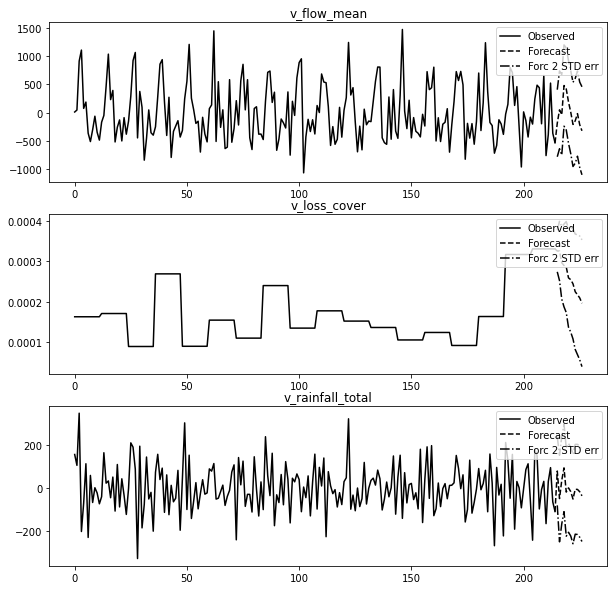

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.940003      0.000018          0.059979
2       0.924655      0.004009          0.071336
3       0.913485      0.009945          0.076570
4       0.910957      0.013721          0.075321

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000017      0.999983          0.000000
1       0.001424      0.991996          0.006580
2       0.007578      0.975105          0.017317
3       0.009086      0.971146          0.019768
4       0.009695      0.972926          0.017379

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.140966      0.000354          0.858679
1       0.162703      0.000491          0.836806
2       0.162477      0.000571          0.836952
3       0.162620      0.005250          0.832129
4       0.168573      0.007065          0.824362


None
Bias: -489.327077
Mean absolute error: 5

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


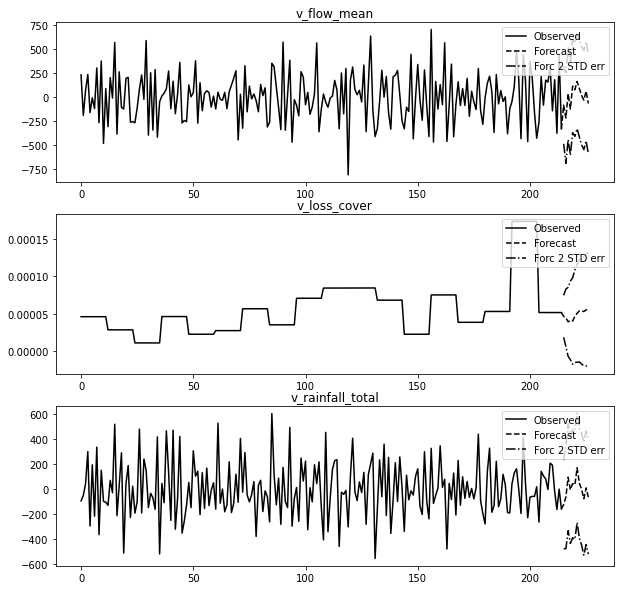

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.993546      0.001033          0.005421
2       0.976404      0.015221          0.008375
3       0.975737      0.015155          0.009108
4       0.972515      0.017273          0.010212

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.008307      0.991693          0.000000
1       0.007767      0.990995          0.001238
2       0.005443      0.993357          0.001200
3       0.005053      0.984052          0.010895
4       0.007238      0.975947          0.016814

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.288391      0.000419          0.711190
1       0.236543      0.000332          0.763125
2       0.288036      0.001752          0.710212
3       0.285857      0.003346          0.710797
4       0.283496      0.003721          0.712783


None
Bias: -40.358221
Mean absolute error: 24

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


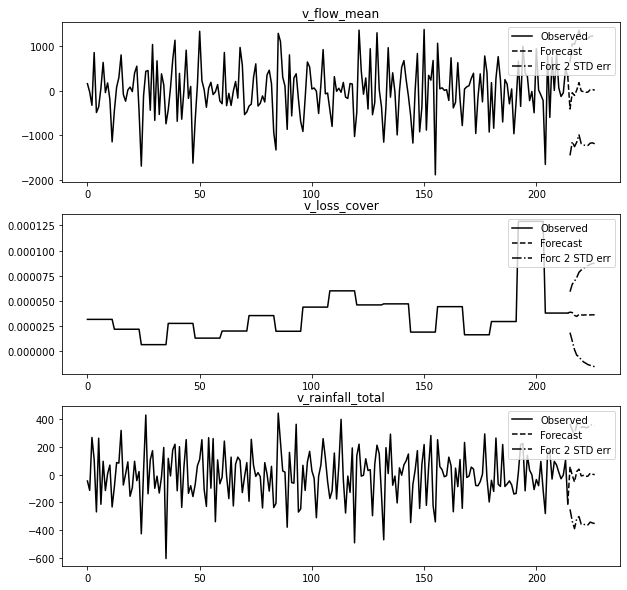

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.938250      0.011366          0.050384
2       0.899380      0.038182          0.062439
3       0.901655      0.037705          0.060640
4       0.901393      0.038200          0.060407

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.048960      0.951040          0.000000
1       0.046939      0.949259          0.003802
2       0.036021      0.957678          0.006302
3       0.030296      0.964804          0.004900
4       0.025690      0.969832          0.004478

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.367356      0.006810          0.625834
1       0.354188      0.007385          0.638427
2       0.372678      0.010461          0.616861
3       0.375640      0.010648          0.613713
4       0.386393      0.010451          0.603156


None
Bias: 733.995566
Mean absolute error: 77

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


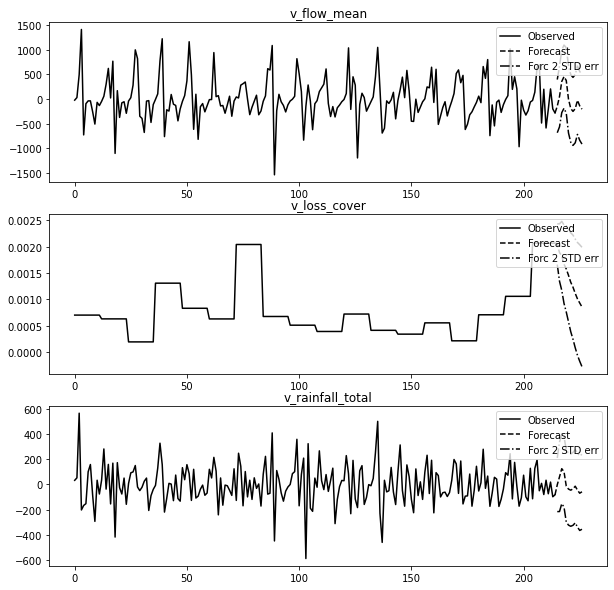

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.998914      0.000155          0.000931
2       0.997766      0.000271          0.001962
3       0.992715      0.002272          0.005013
4       0.931756      0.062650          0.005594

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000143      0.999857          0.000000
1       0.001112      0.991051          0.007837
2       0.000873      0.992926          0.006201
3       0.000688      0.994315          0.004997
4       0.000623      0.993838          0.005539

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.241568      0.002544          0.755887
1       0.247097      0.001709          0.751194
2       0.246791      0.008439          0.744770
3       0.243250      0.019978          0.736772
4       0.240215      0.023383          0.736402


None
Bias: -208.817571
Mean absolute error: 3

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


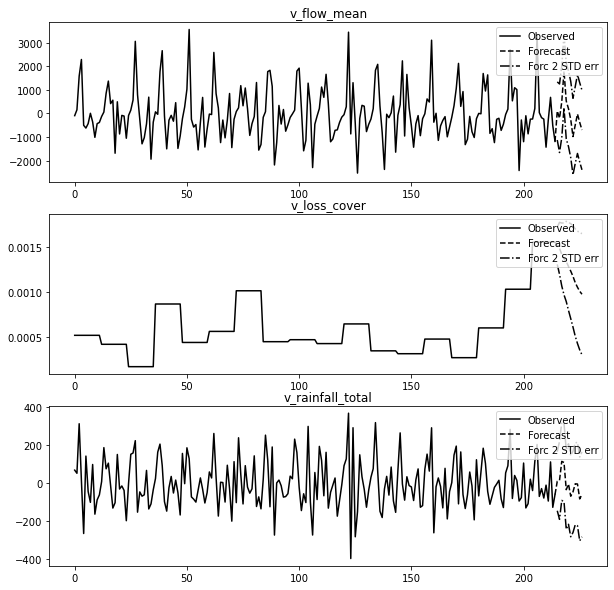

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.932207      0.002531          0.065262
2       0.914322      0.016782          0.068897
3       0.880134      0.052669          0.067197
4       0.839852      0.049914          0.110234

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.000017      0.999983          0.000000
1       0.000806      0.997215          0.001979
2       0.000949      0.997692          0.001359
3       0.001789      0.996935          0.001276
4       0.003201      0.992319          0.004479

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.365470      0.000493          0.634037
1       0.416648      0.000733          0.582619
2       0.416561      0.001306          0.582132
3       0.414231      0.007410          0.578359
4       0.403885      0.008966          0.587148


None
Bias: -290.075315
Mean absolute error: 9

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


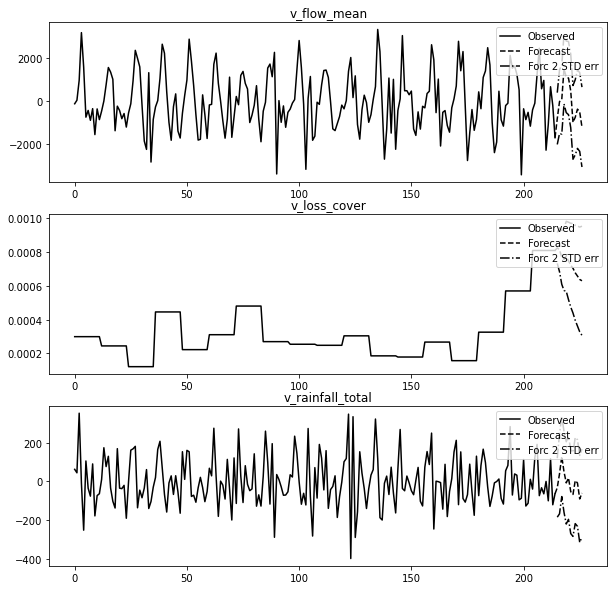

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.783496      0.000549          0.215954
2       0.792595      0.000471          0.206934
3       0.784860      0.010706          0.204434
4       0.750907      0.012100          0.236994

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.003656      0.996344          0.000000
1       0.008467      0.986558          0.004975
2       0.005591      0.990590          0.003819
3       0.004300      0.992701          0.002999
4       0.005626      0.988808          0.005567

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.056231      0.000002          0.943767
1       0.109417      0.000001          0.890582
2       0.112067      0.001710          0.886223
3       0.122519      0.006604          0.870877
4       0.142026      0.006695          0.851279


None
Bias: -989.142144
Mean absolute error: 1

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Jul, 2020
Time:                     18:21:44
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    3.51022
Nobs:                     204.000    HQIC:                   2.52228
Log likelihood:          -955.209    FPE:                    6.42745
AIC:                      1.85116    Det(Omega_mle):         4.04761
--------------------------------------------------------------------
Results for equation v_flow_mean
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                      205.138675       138.166000            1.485           0.138
L1.v_flow_mean              -0.625455         0.074554           -8.389           0.000
L1.v_loss_cover         27

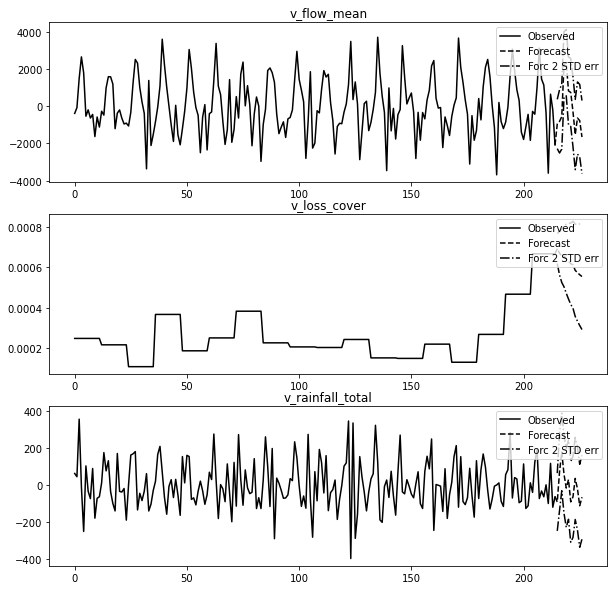

FEVD for v_flow_mean
     v_flow_mean  v_loss_cover  v_rainfall_total
0       1.000000      0.000000          0.000000
1       0.799659      0.000174          0.200167
2       0.798070      0.001222          0.200708
3       0.780867      0.001287          0.217846
4       0.772142      0.007413          0.220445

FEVD for v_loss_cover
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.003696      0.996304          0.000000
1       0.014864      0.984093          0.001044
2       0.013884      0.984387          0.001729
3       0.016954      0.979974          0.003072
4       0.013949      0.983435          0.002616

FEVD for v_rainfall_total
     v_flow_mean  v_loss_cover  v_rainfall_total
0       0.011361      0.000010          0.988630
1       0.047827      0.000636          0.951537
2       0.052688      0.000967          0.946345
3       0.053180      0.008633          0.938187
4       0.052177      0.008820          0.939002


None
Bias: -1552.054159
Mean absolute error: 

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [13]:
AIC = []
BIC = []
RMSE = []
means = []
sd = []
MAPE = []
sMAPE = []
p_order = []
list_df_plot = []

for i in mcs:
    print("\n ################ Basin " + str(i) + " ############### \n")
    #select data for that basin, split train and test
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover', 
                                     'v_rainfall_total']].copy().reset_index(drop = True)
    nobs = 24 #predict 1 year
    df_train, df_test = temp_df[0:-nobs], temp_df[-nobs:]

    # 1st difference to transform to Stationary
    df_differenced = df_train.diff().dropna()# stationarity test again with differenced data


    # VAR model fitting
    model = VAR(df_differenced)
    results = model.fit(maxlags=12, ic='aic') #choose VAR order p from 0 to maxlags, the one with lowest AIC
    print(results.summary())
    AIC.append(results.aic)
    BIC.append(results.aic)
    p_order.append(results.k_ar)

    results.plot_forecast(12)
    plt.show()

    fevd = results.fevd(5)
    print(fevd.summary())

    # forecasting
    pred = results.forecast(results.y, steps=nobs)
    df_forecast = pd.DataFrame(pred, index=temp_df.index[-nobs:], columns=temp_df.columns + '_1d')

    df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
    df_results.loc[:, ['v_flow_mean_forecast', 'v_loss_cover_forecast', 'v_rainfall_total_forecast']]

    #Forecast bias
    forecast_errors = df_results['v_flow_mean_forecast'] - df_test['v_flow_mean']
    bias = sum(forecast_errors) * 1.0/len(df_test['v_flow_mean'])
    print('Bias: %f' % bias)
    print('Mean absolute error:', mean_absolute_error(df_test['v_flow_mean'], df_results['v_flow_mean_forecast']))
    print('Mean squared error:', mean_squared_error(df_test['v_flow_mean'], df_results['v_flow_mean_forecast']))
    print('Root mean squared error:', sqrt(mean_squared_error(df_test['v_flow_mean'], df_results['v_flow_mean_forecast'])))
    
    RMSE.append(sqrt(mean_squared_error(df_test['v_flow_mean'], df_results['v_flow_mean_forecast'])))
    MAPE.append(np.mean(np.abs((df_test['v_flow_mean'] - df_results['v_flow_mean_forecast']) / df_test['v_flow_mean'])) * 100)
    sMAPE.append(np.mean(np.abs((df_test['v_flow_mean'] - df_results['v_flow_mean_forecast']) / (abs(df_test['v_flow_mean'])+abs(df_results['v_flow_mean_forecast'])))) * 100)

    means.append(mean(df_test['v_flow_mean']))
    sd.append(std(df_test['v_flow_mean']))
    
    #Export observed and predicted for plotting
    dict1 = {'River flow' : temp_df['v_flow_mean'], 'River flow forecast' : df_results['v_flow_mean_forecast']}
    df_plot = pd.DataFrame(dict1)
    df_plot.index = macrodata[data['mc'] == i]['date'].reset_index().date
    list_df_plot.append(df_plot)

In [14]:
#pd.DataFrame(RMSE, means, sd)
dict = {'basin': mcs, 'mean': means, 'stdev': sd, 'AIC': AIC, 'BIC': BIC, 
        'RMSE': RMSE,  'MAPE': MAPE, 'sMAPE': sMAPE, 'p': p_order}  
    
df = pd.DataFrame(dict) 
df

basin         mean        stdev        AIC        BIC         RMSE  \
0       1     2.890417     0.903569  -9.987177  -9.987177     0.380017   
1       2    23.965833    14.174385  -6.680651  -6.680651    10.450333   
2       3   151.052083    66.239974  -4.599209  -4.599209    45.509149   
3       4     5.925417     2.444201  -8.063515  -8.063515     2.678722   
4       5    61.653750    19.756854  -6.976881  -6.976881    22.264741   
5       6    27.537917    14.848566  -6.978685  -6.978685    15.417359   
6       7   240.222682    85.529224  -2.773831  -2.773831    64.821497   
7       8    45.753717    16.947863  -7.274142  -7.274142    14.009654   
8       9    16.009788    14.251713 -12.301145 -12.301145     7.615056   
9      10    13.956584     8.061398  -6.296544  -6.296544     8.120937   
10     11    17.049631     9.437352  -9.995462  -9.995462     8.763499   
11     12    20.932917    14.626127 -10.465468 -10.465468    15.688802   
12     13   263.573173   106.921846  -1.255084  -1.255084   118.916760   
13     14    79.408050    39.234738  -7.369848  -7.369848    32.650226   
14     15    72.828840    42.494364  -1.663927  -1.663927    27.385591   
15     16   428.345914   142.060388  -0.090490  -0.090490   135.616559   
16     17    12.489942     3.749133 -10.424390 -10.424390     2.534430   
17     18    56.663385    14.942448  -3.456142  -3.456142    11.281167   
18     19     8.536236     7.926062 -10.201882 -10.201882     7.549599   
19     20    87.001271    57.942252  -4.229741  -4.229741    86.615623   
20     21     8.979167     2.136098  -8.414186  -8.414186     2.565489   
21     22   208.268475   161.885295  -2.841843  -2.841843    90.622653   
22     23   163.244167   113.126321  -3.991416  -3.991416    81.912639   
23     24    18.346383    12.910741  -4.567756  -4.567756    12.780496   
24     25     8.636250     4.018466  -7.948080  -7.948080     3.508557   
25     26    97.667500   194.746661  -2.549364  -2.549364   219.060426   
26     27    14.153333    14.182719  -5.191217  -5.191217    14.676904   
27     28    69.022473    38.772475  -2.347755  -2.347755    27.660838   
28     29    59.189583     3.987721  -5.490562  -5.490562     5.251079   
29     30     8.717907     6.669532  -7.052347  -7.052347     9.471368   
30     31     7.962437     1.705848  -9.411401  -9.411401     1.598232   
31     32    34.002083    10.103770  -7.924001  -7.924001    10.405850   
32     33     4.293333     1.842678 -10.026721 -10.026721     2.051777   
33     34   352.778402   176.603555  -3.768349  -3.768349   144.820838   
34     35   391.563643   121.344587  -1.688566  -1.688566   100.614656   
35     36   164.614974   133.199679  -2.427500  -2.427500    97.017122   
36     37   107.344258    74.999943  -3.306795  -3.306795    62.742468   
37     38    49.125775    15.894248  -7.002326  -7.002326    24.704043   
38     39   951.994167   631.779777  -2.772817  -2.772817   343.720318   
39     40  1753.875182  1349.982870  -2.163321  -2.163321   656.112775   
40     41  3993.893142  3055.902412  -0.974815  -0.974815  1494.659567   
41     42  1422.051497   856.980708  -0.557873  -0.557873   704.750228   
42     43   999.799379   310.987388  -1.161137  -1.161137   307.674412   
43     44  2856.508812   704.921244  -0.628273  -0.628273  1008.046776   
44     45   945.945260   861.187066   3.733748   3.733748   625.100747   
45     46  2426.940599  1927.883345   3.302532   3.302532  1240.573181   
46     47  3265.878164  2741.836899   2.004872   2.004872  1853.027818   
47     48  4336.866133  3138.604312   1.851161   1.851161  2104.089114   

          MAPE      sMAPE   p  
0    12.022449   5.894861  12  
1    83.975023  22.543149  12  
2    31.499597  12.715241  12  
3    51.019828  18.507438   5  
4    22.254400  12.930103   5  
5    32.068039  17.999262   7  
6    30.020062  12.496363  12  
7    34.251335  14.829169  12  
8    63.274365  24.409331  11  
9    37.711635  22.440701  11  
10   44.868276  19.036691

In [15]:
df.to_csv(r'VAR_results_2years.csv', index=False)

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfa

C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Diana\.conda\envs\ds4a\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


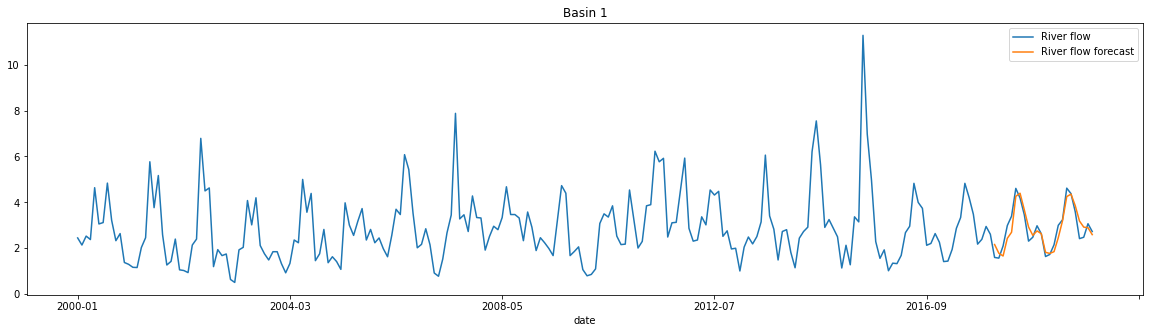

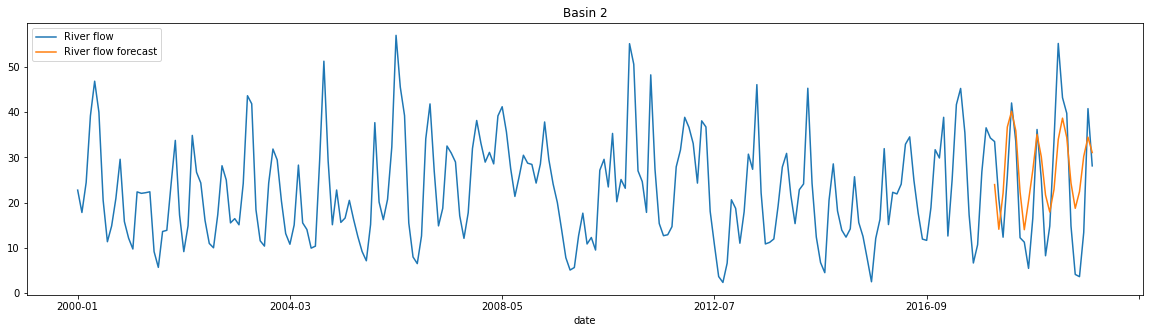

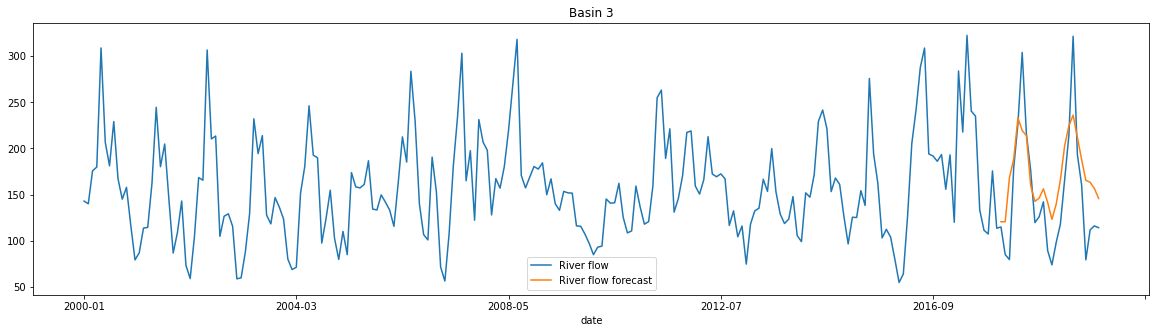

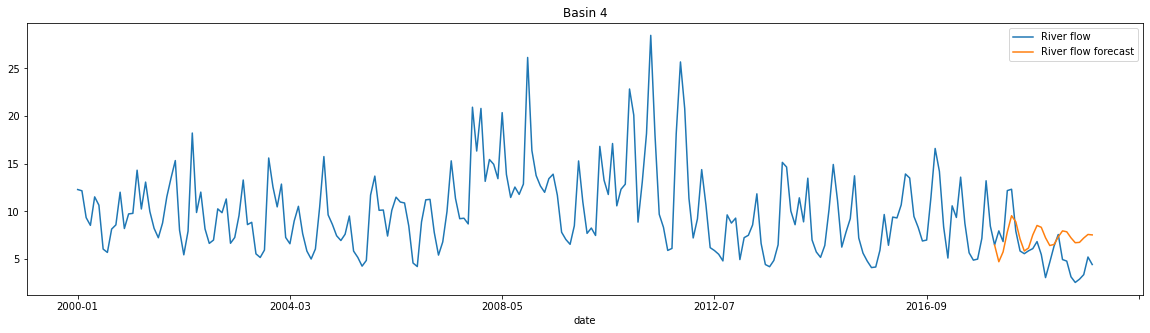

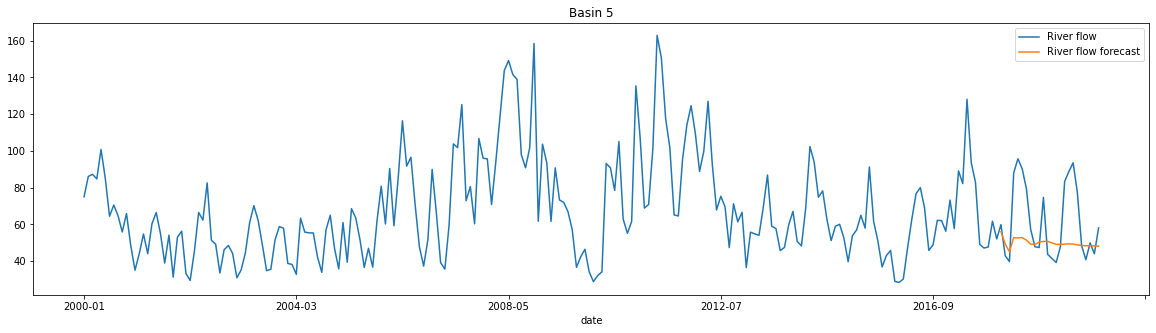

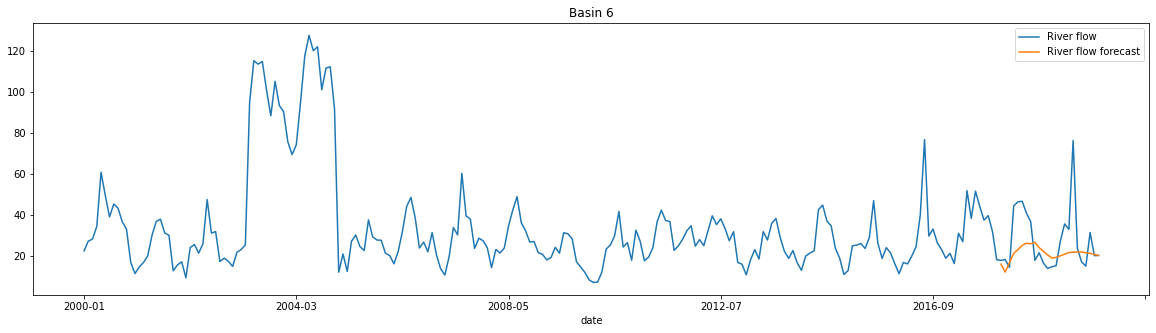

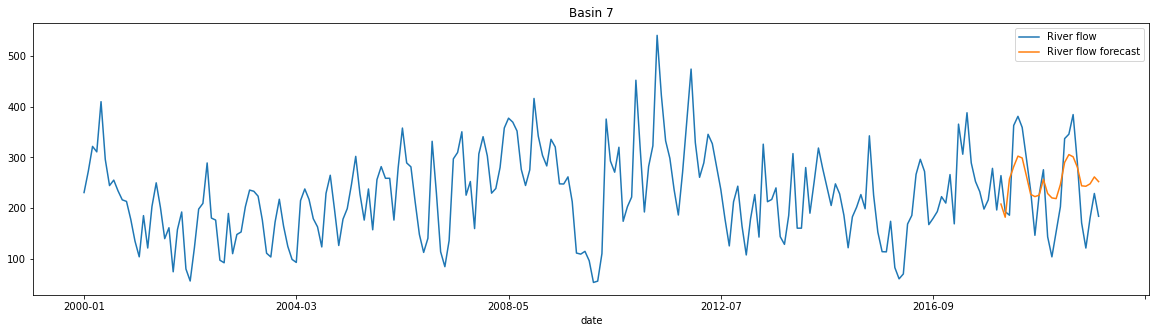

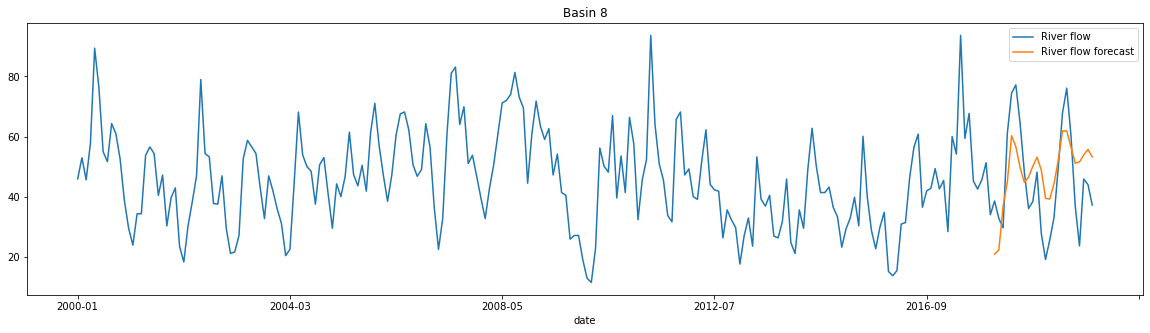

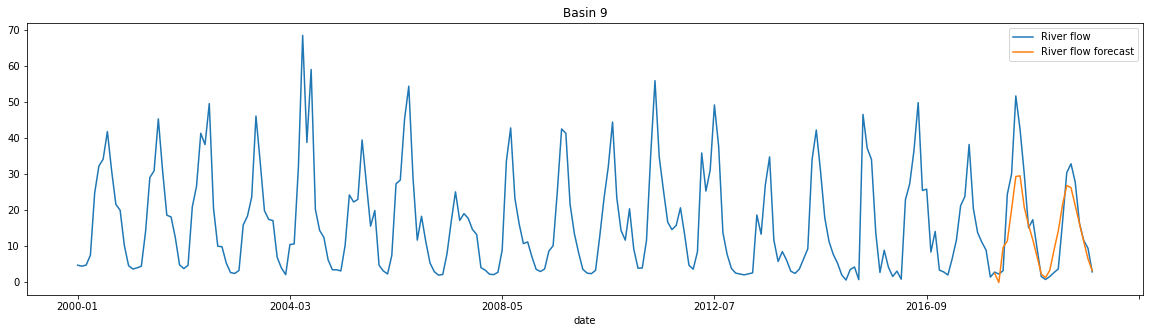

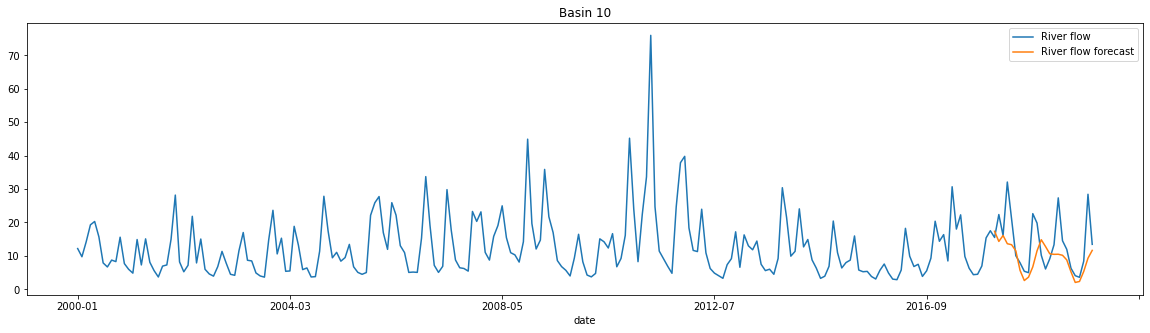

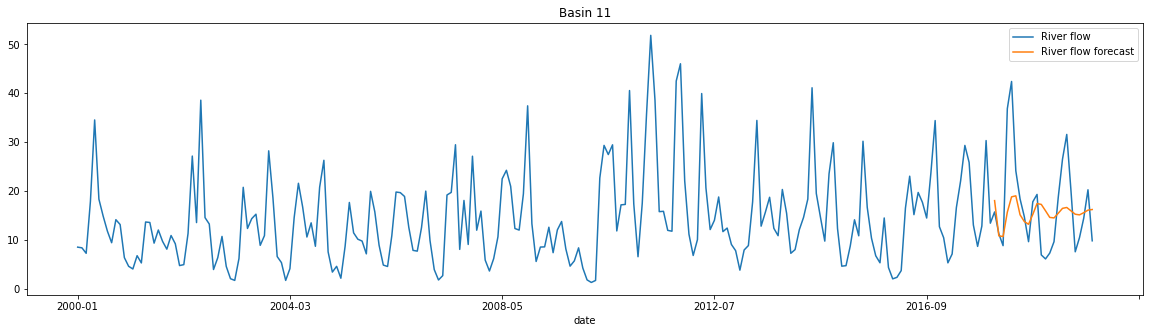

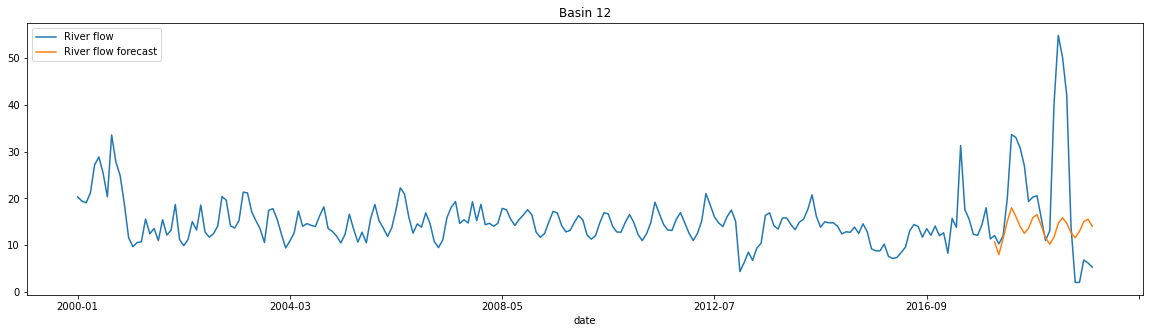

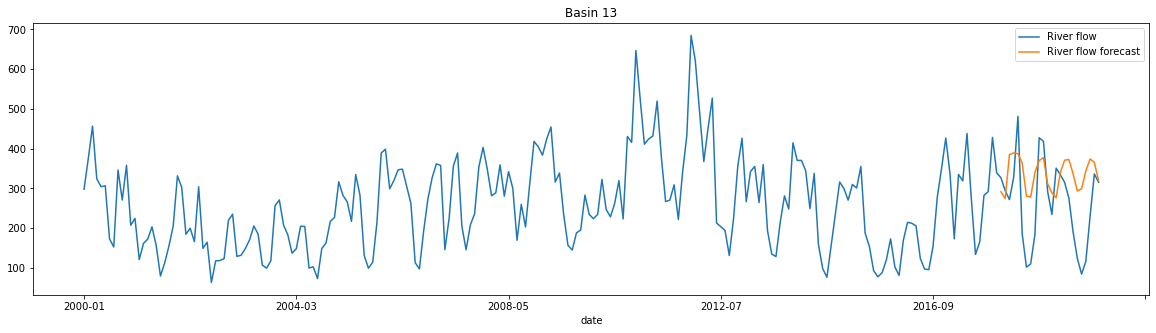

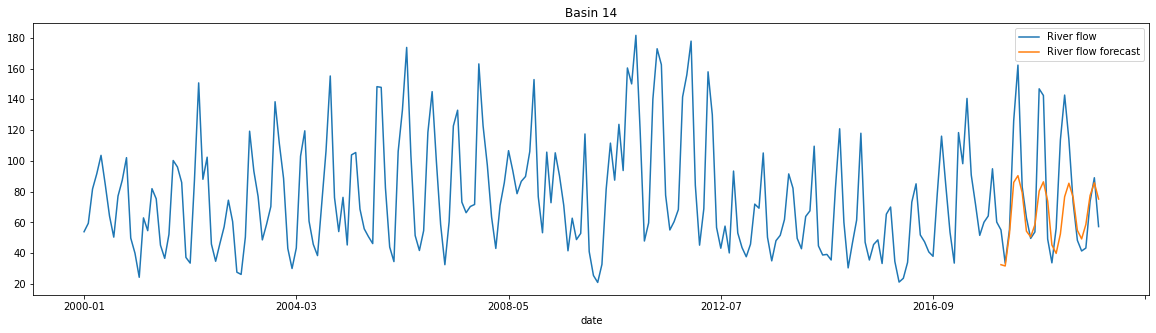

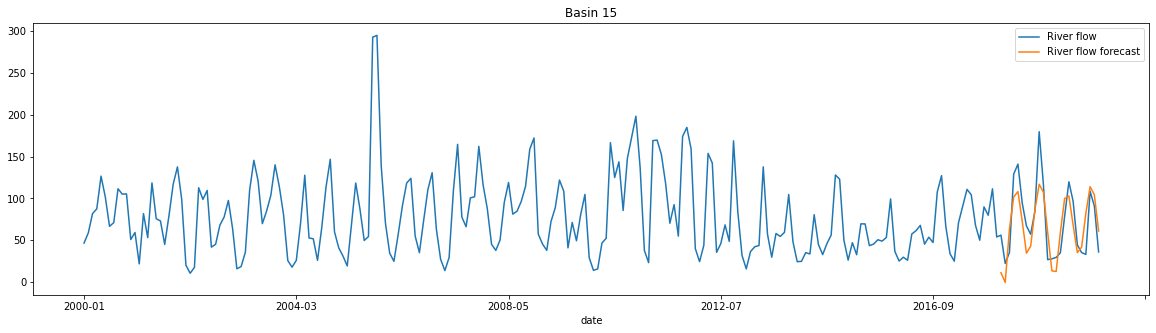

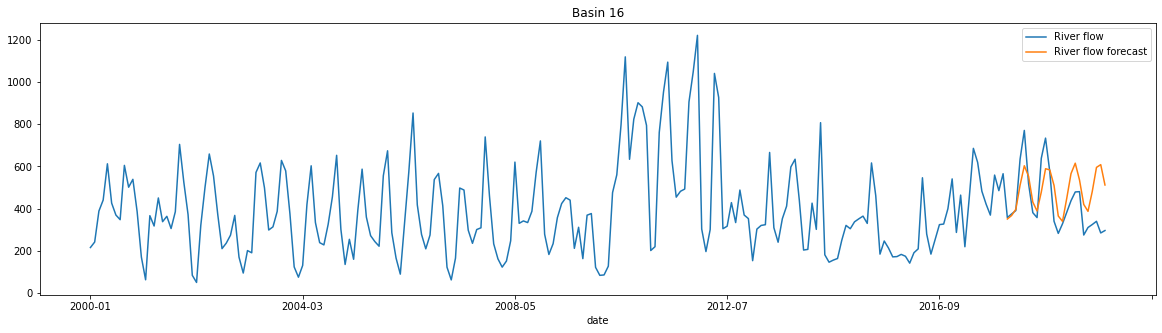

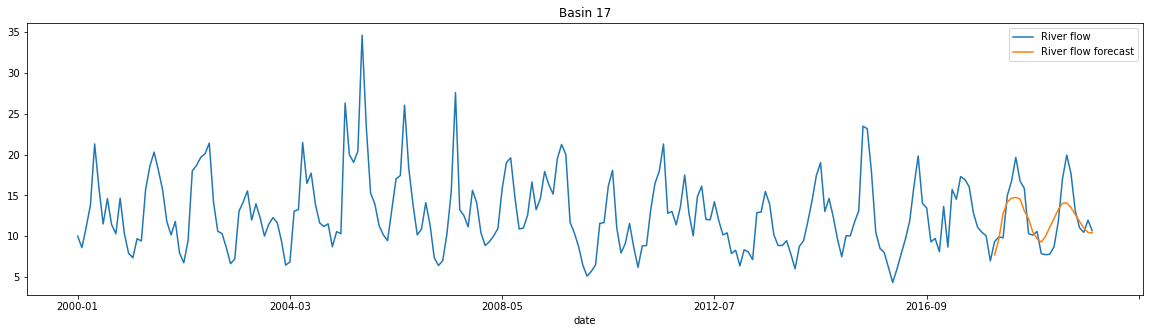

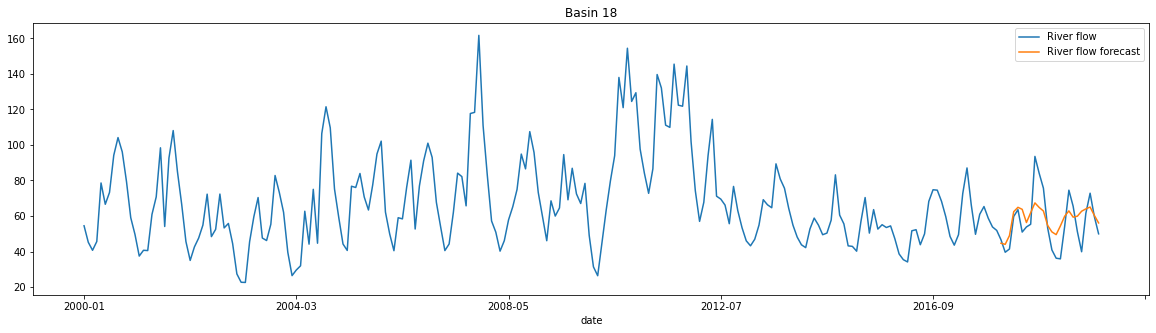

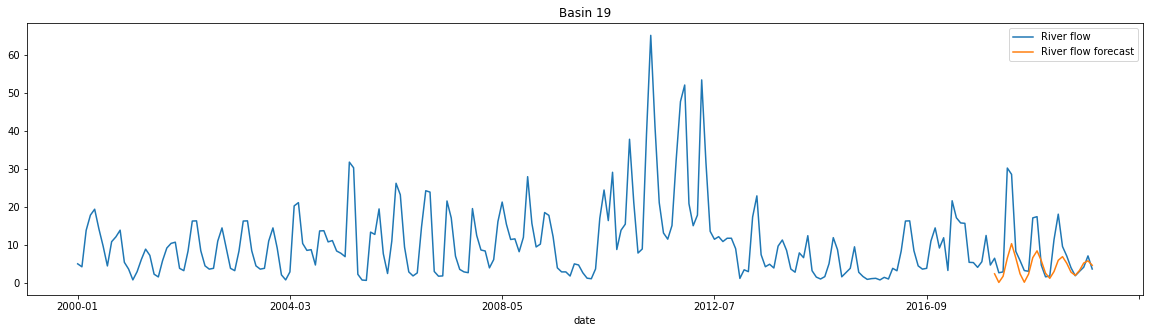

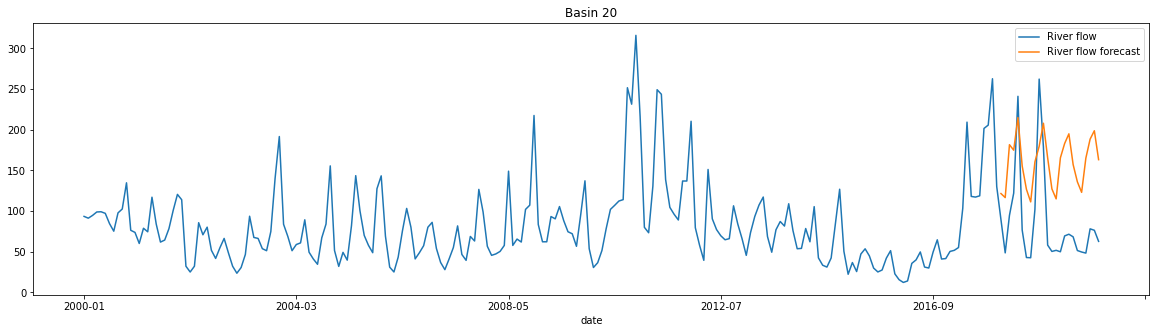

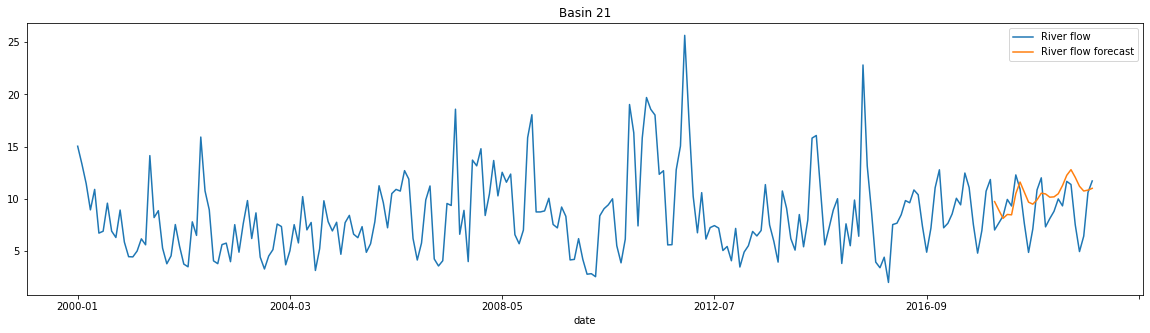

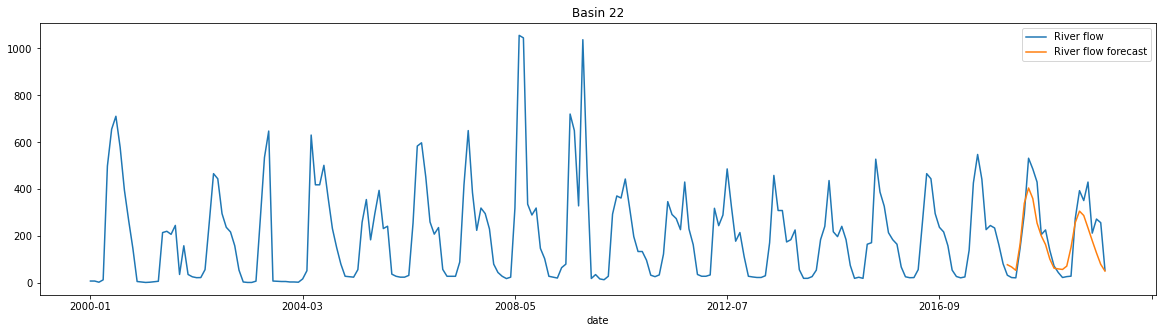

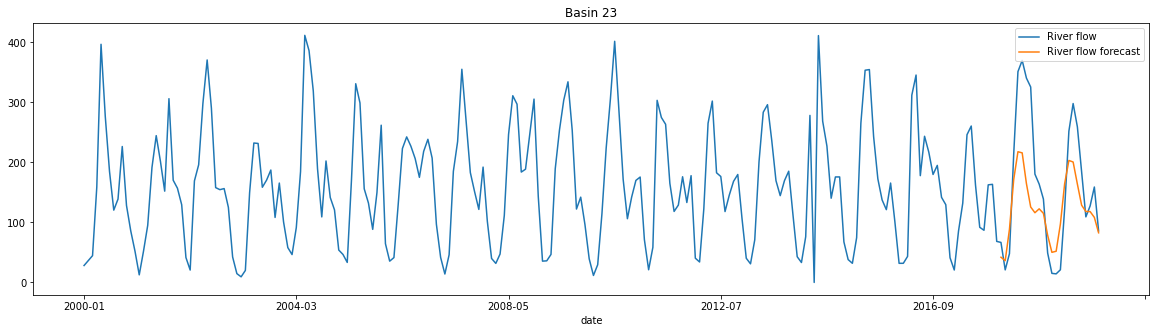

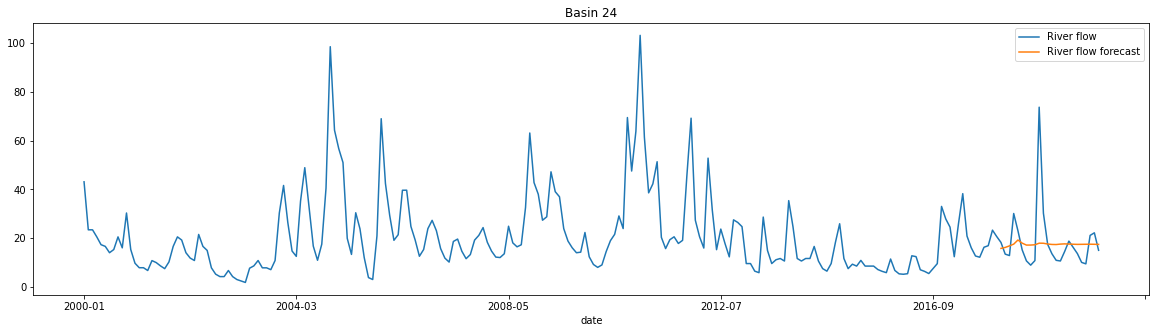

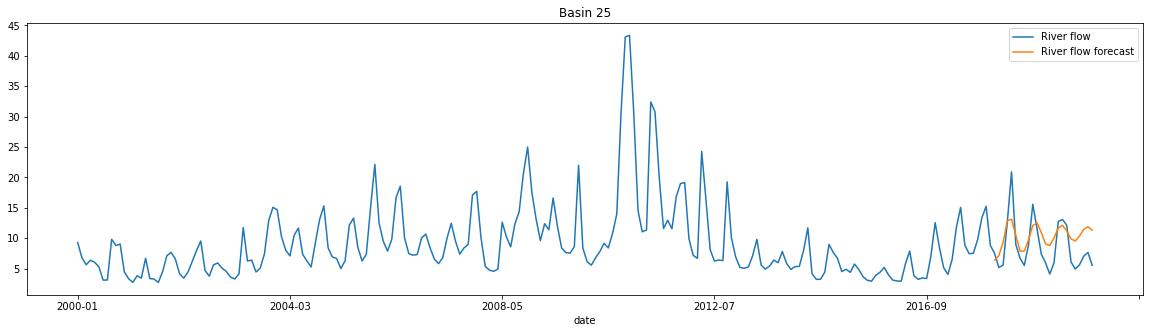

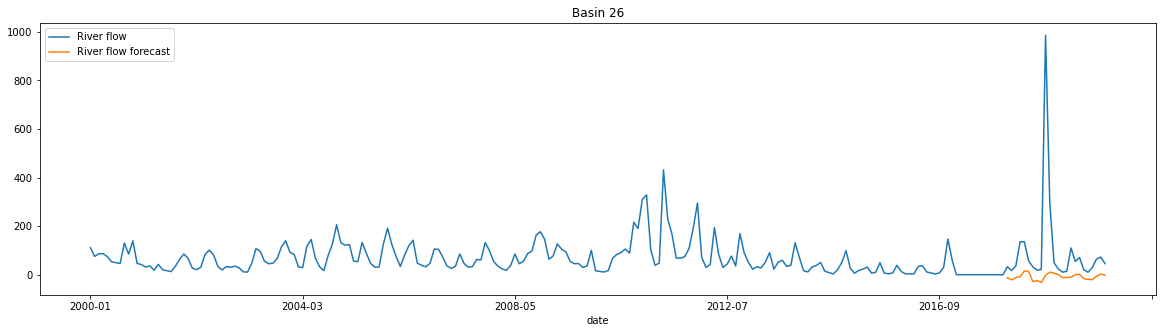

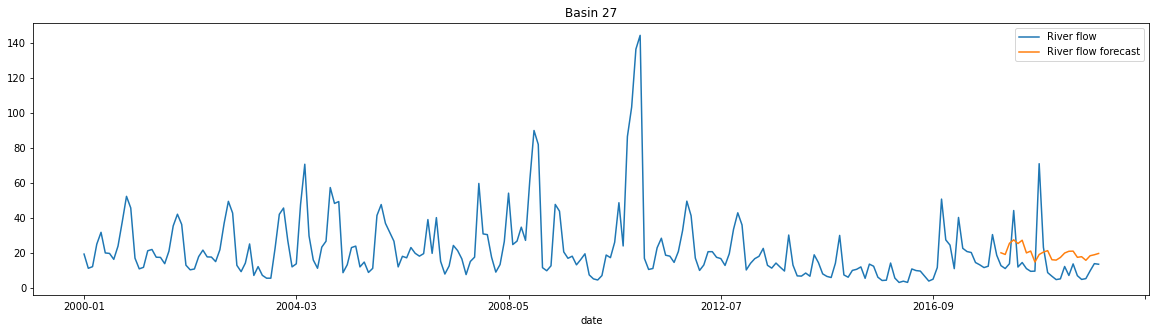

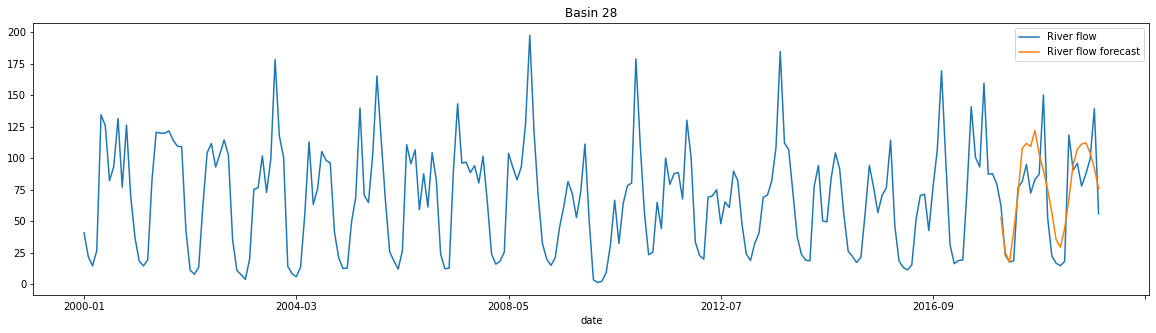

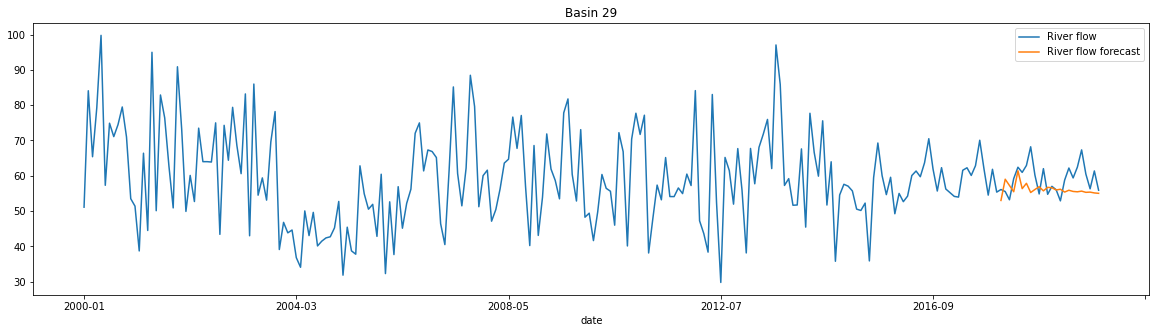

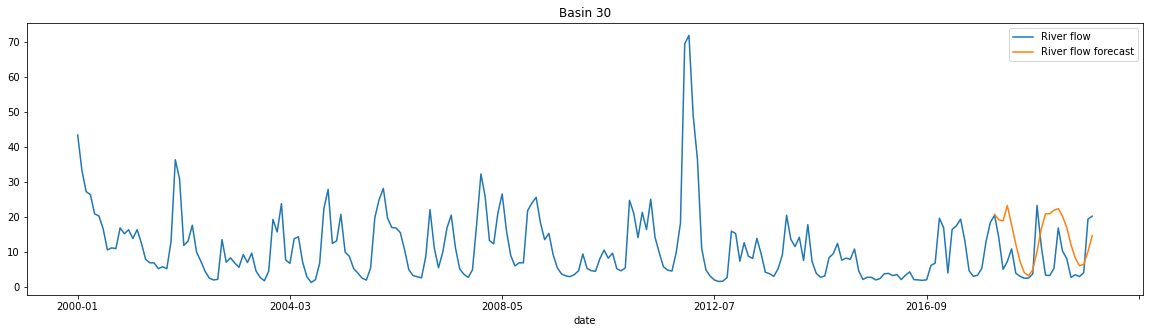

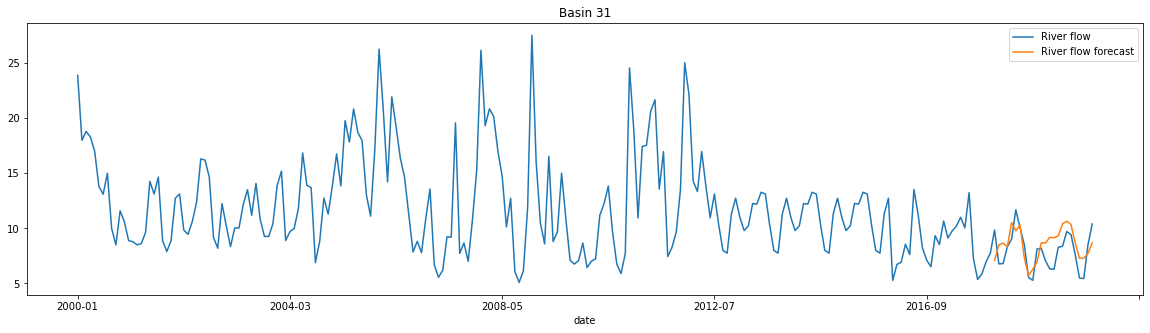

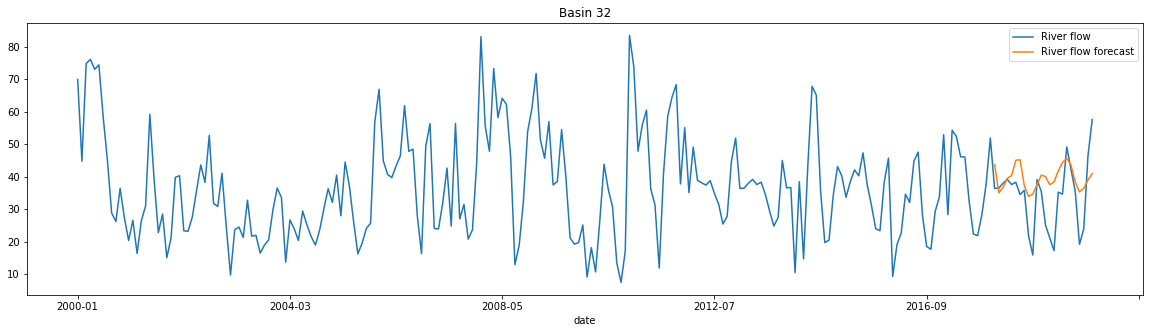

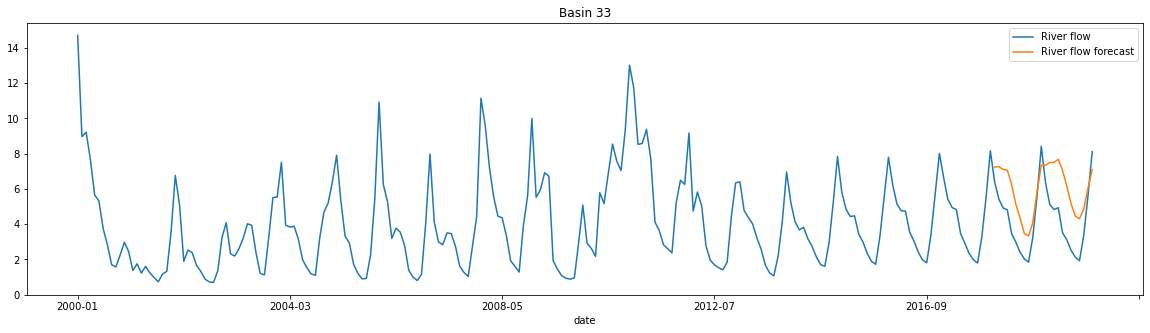

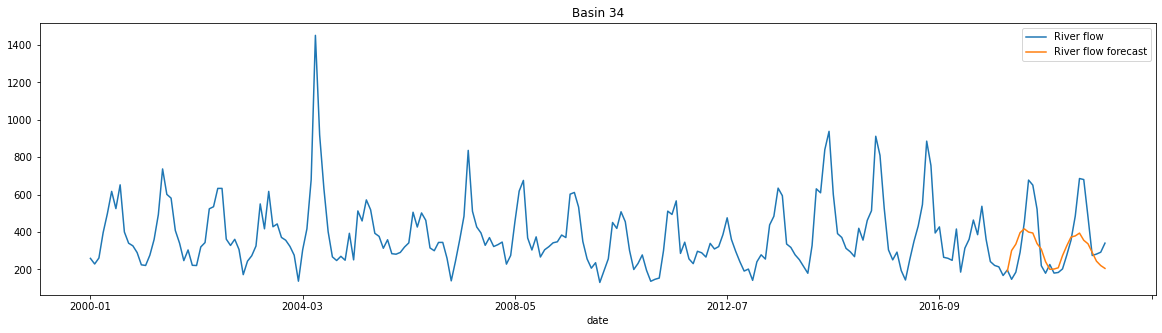

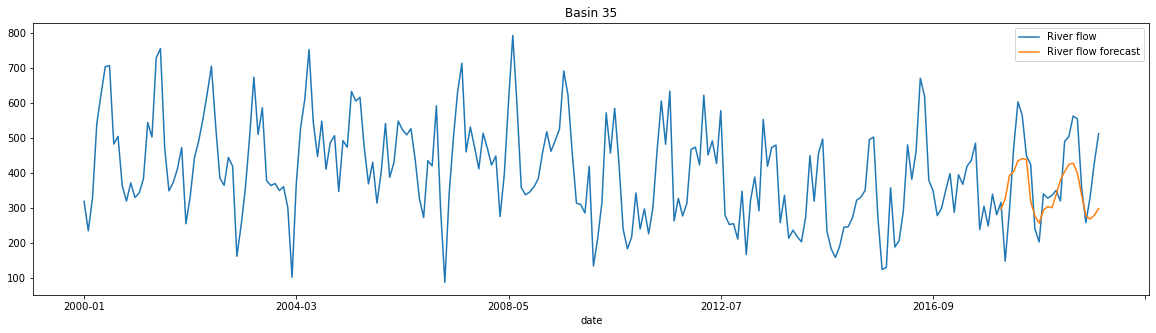

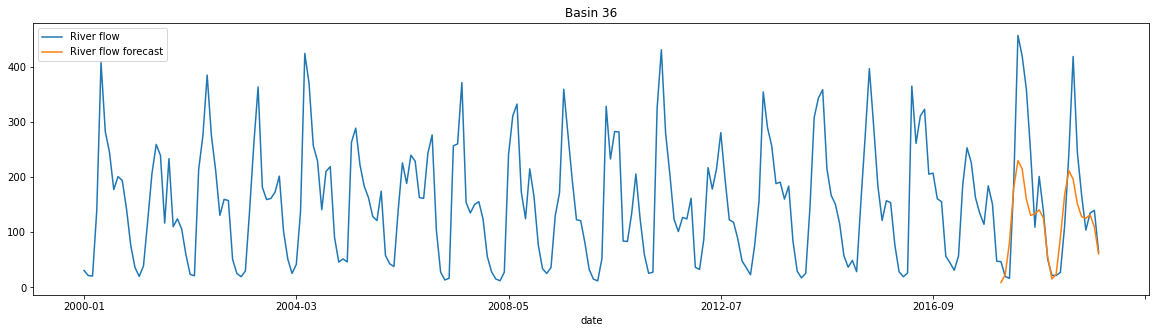

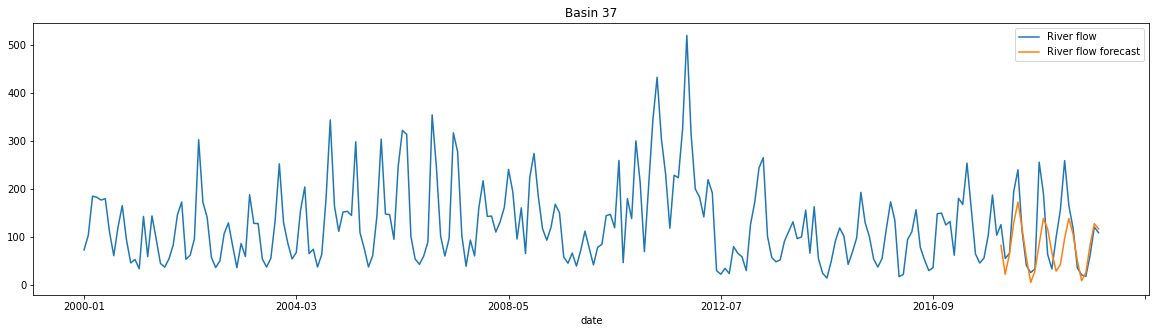

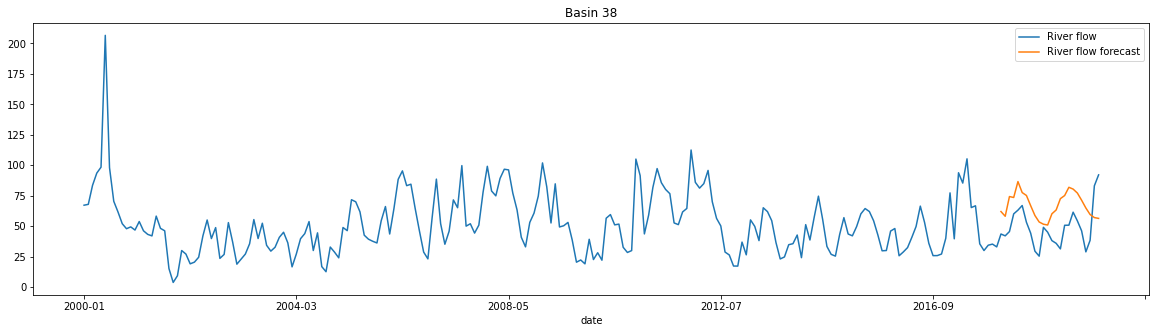

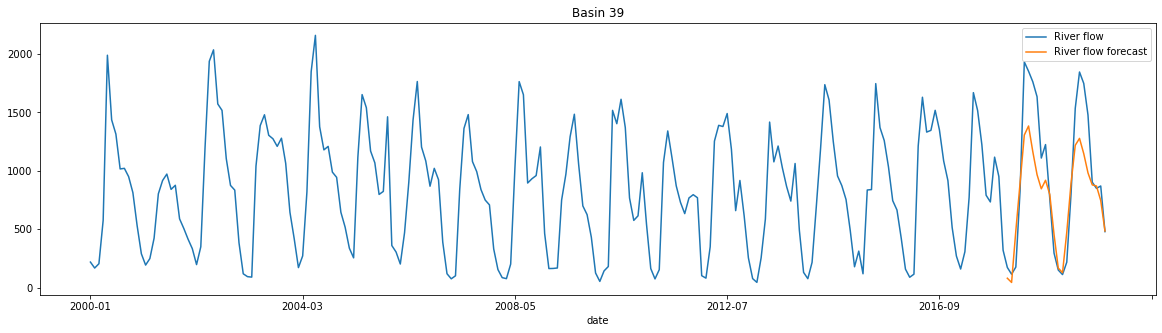

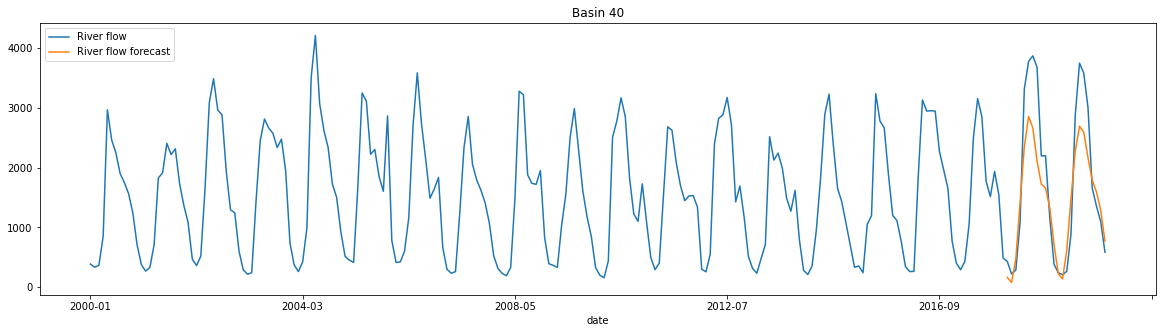

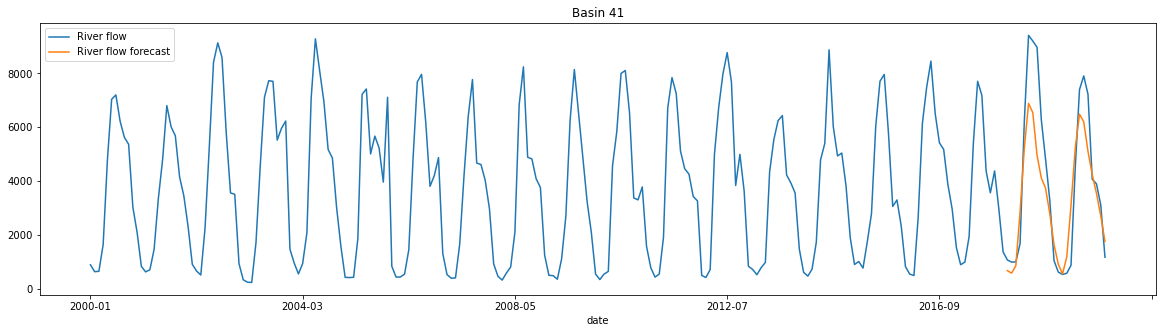

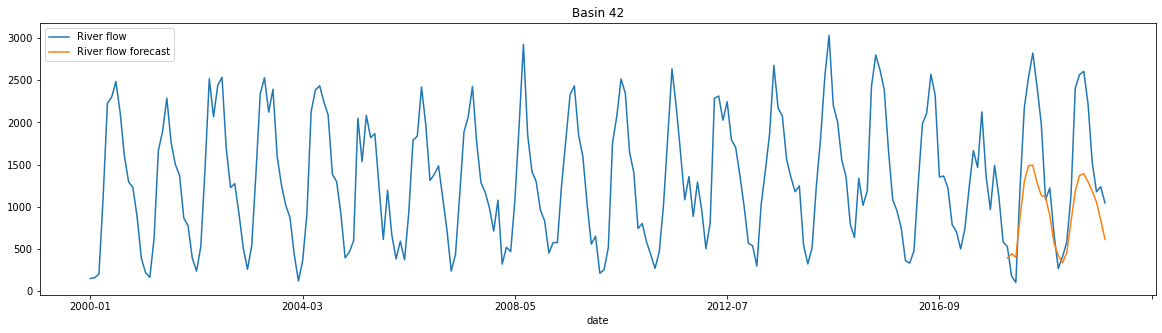

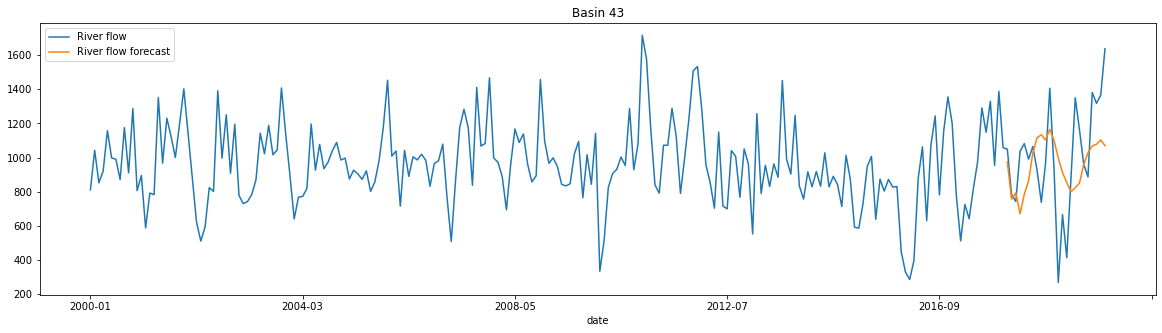

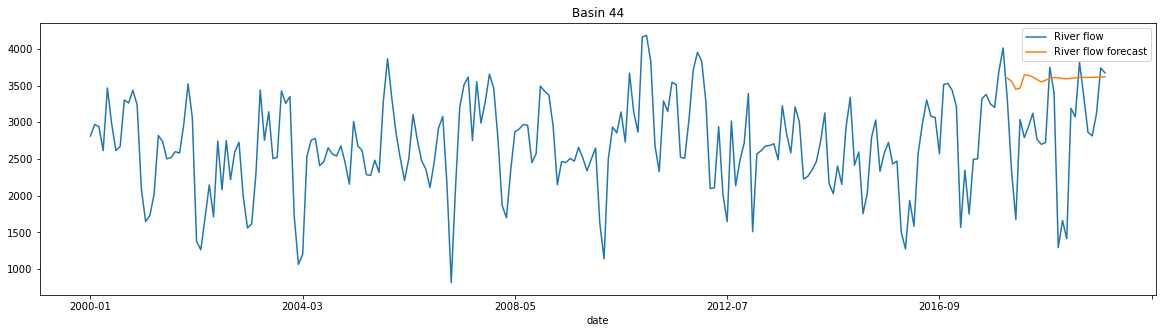

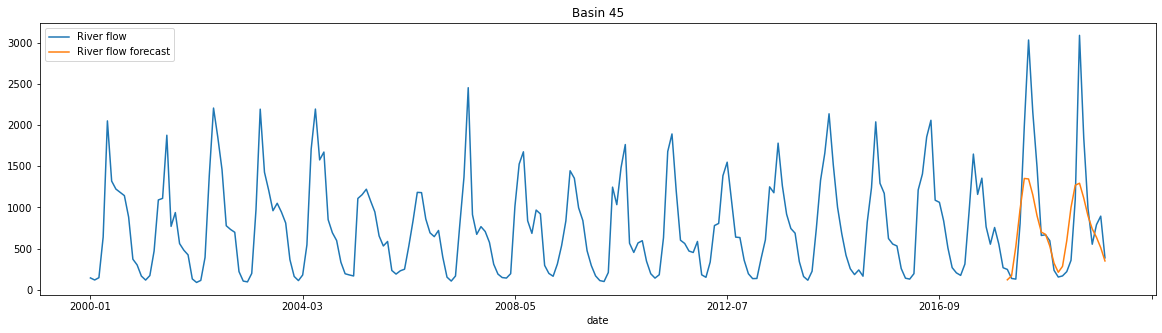

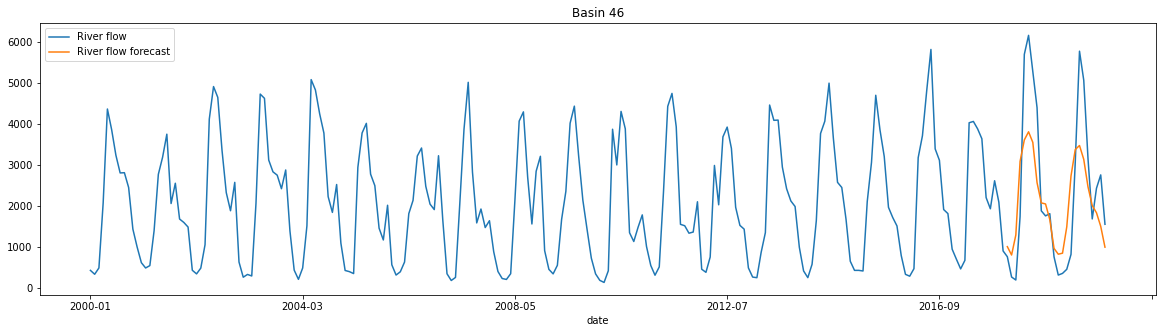

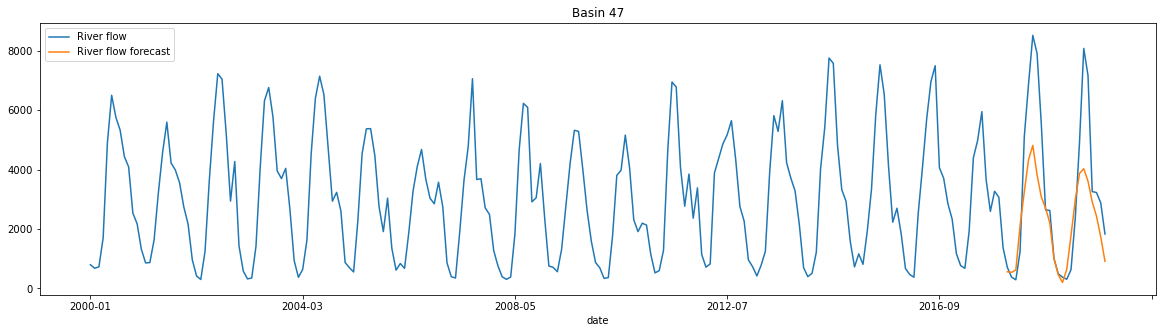

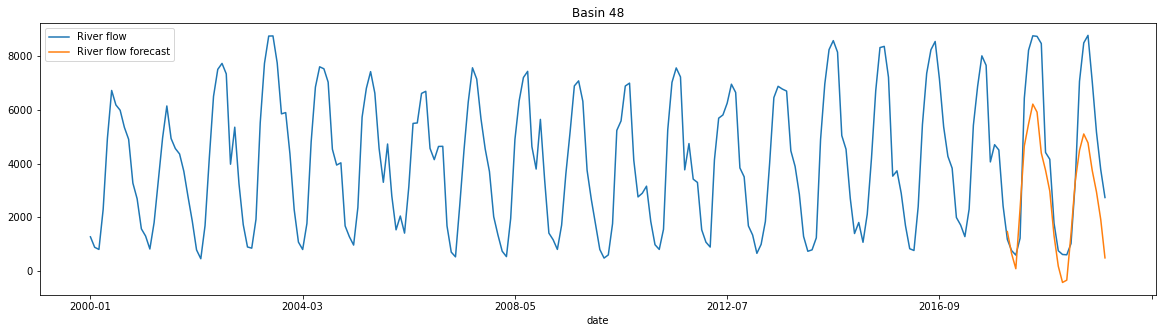

In [16]:
for i in range(len(list_df_plot)): 
    list_df_plot[i].plot(figsize=(20,5))
    plt.title("Basin " + str(i+1))

In [17]:
list_out = []
for i in range(len(mcs)):
    tmp = list_df_plot[i].copy()
    tmp['Basin'] = mcs[i]
    list_out.append(tmp)

df_out = pd.concat(list_out, axis=0)

In [18]:
df_out

River flow  River flow forecast  Basin
date                                            
2000-01     2.450000                  NaN      1
2000-02     2.140000                  NaN      1
2000-03     2.530000                  NaN      1
2000-04     2.380000                  NaN      1
2000-05     4.640000                  NaN      1
...              ...                  ...    ...
2019-08  8772.352875          4772.394263     48
2019-09  7051.413625          3741.886228     48
2019-10  5164.225750          2944.216127     48
2019-11  3775.500000          1921.147179     48
2019-12  2736.000000           489.849658     48

[11520 rows x 3 columns]

In [19]:
df_out.to_csv(r'VAR_predictions_2years.csv')